<a href="https://colab.research.google.com/github/hidemet/mldm-credit-card-risk/blob/main/Copy_of_ProgettoMLDM_Dumas_Rossini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1 Introduzione

### 1.1 Contesto

Questo progetto si concentra sull'analisi del dataset "Statlog (German Credit Data)", disponibile presso l'UCI Machine Learning Repository. Il dataset contiene informazioni su 1000 richieste di credito presso una banca tedesca. Ogni richiesta (istanza) è descritta da 20 attributi, che includono caratteristiche demografiche, finanziarie e relative al credito richiesto. L'obiettivo principale è quello di costruire un modello di Machine Learning in grado di classificare i richiedenti come "buoni" o "cattivi" pagatori, in base a questi attributi. Questo è un problema di classificazione binaria.

### 1.2 Dataset
Il dataset originale presenta attributi sia numerici che categorici (espressi come stringhe/codici). Per questo progetto abbiamo utilizzato il file "german.data", che contiene i dati in un formato leggibile (separati da spazio). Abbiamo quindi provveduto ad una conversione degli attributi catergorici in numerici. Un dataset con solo dati numerici "german.data-numeri" era già presente ed è stato usato come controllo e verifica delle conversioni da noi effettuate.

### 1.3 Attributi

Il dataset contiene 20 attributi (features). Ecco una breve descrizione:

* **Attributo 1** (Stato del conto corrente): Categorico. Indica lo stato del conto corrente del richiedente, diviso in fasce (es. "< 0 DM", "0-200 DM", ecc.).
* **Attributo 2** (Durata in mesi): Numerico. Indica la durata del credito richiesto, espressa in mesi.
* **Attributo 3** (Storia creditizia): Categorico. Descrive la storia creditizia del richiedente (es. "nessun credito preso", "crediti pagati regolarmente", ecc.).
* **Attributo 4** (Scopo): Categorico. Indica lo scopo per cui viene richiesto il credito (es. "auto", "mobili/attrezzature", "radio/TV", ecc.).
* **Attributo 5** (Importo del credito): Numerico. Indica l'importo del credito richiesto (in DM, Deutsch Mark).
* **Attributo 6** (Risparmi): Categorico. Indica lo stato del conto di risparmio.
* **Attributo 7** (Durata impiego): Categorico.
* **Attributo 8** (Tasso): Numerico. Percentuale del reddito disponibile
* **Attributo 9** (Stato civile e sesso): Categorico.
* **Attributo 10** (Garanzie): Categorico.
* **Attributo 11** (Residenza): Numerico. Anni
* **Attributo 12** (Proprietà): Categorico.
* **Attributo 13** (Età): Numerico. Anni
* **Attributo 14** (Altri piani rateali): Categorico.
* **Attributo 15** (Alloggio): Categorico.
* **Attributo 16** (Numero di Crediti): Numerico.
* **Attributo 17** (Lavoro): Categorico.
* **Attributo 18** (Numero di persone da mantenere): Numerico.
* **Attributo 19** (Telefono): Categorico.
* **Attributo 20** (Lavoratore straniero): Categorico.
* **Variabile Target** (Rischio): Indica se il richiedente è considerato un "buon" pagatore (codificato come 1) o un "cattivo" pagatore (codificato come 2).

## 2 Libraries & Dataset

### 2.1 Import Libraries

In [ ]:
# Load the libraries
# %pip install seaborn scipy scikit-learn -q
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline
# Importa le classi dei modelli QUI:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, StratifiedKFold, RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

### 2.2 Load data

In [ ]:
def load_and_prepare_data(url):
    """
    Load and prepare the German Credit Risk dataset.

    Args:
        url (str): URL to the dataset.

    Returns:
        pd.DataFrame: Processed dataframe with mapped categorical values.
    """
    # Define column names
    column_names = [
        "Account_balance",      # 1 Saldo contabile (diviso in quattro fasce)
        "Duration",             # 2 (month)
        "Credit_history",       # 3
        "Purpose",              # 4
        "Credit_amount",        # 5
        "Saving_accounts",      # 6
        "Employment_length",    # 7
        "Installment_rate",     # 8 (% sul reddito disponibile)
        "Sex_and_Marital_status", # 9
        "Guarantor",            # 10
        "Residence_duration",   # 11
        "Most_valuable_asset",  # 12
        "Age",                  # 13
        "Concurrent_credits",   # 14
        "Type_apartment",       # 15
        "Existing_credits_count", # 16
        "Job",                  # 17
        "Dependents_count",     # 18
        "Telephone",            # 19
        "Foreign_worker",       # 20
        "Credit_risk"           # target
    ]

    # Load data
    data = pd.read_csv(url, sep=" ", header=None, names=column_names)

    # Define and apply label mappings
    label_mapping = {
        "Account_balance": {'A11': 'low', 'A12': 'medium', 'A13': 'high', 'A14': 'no account'},
        "Credit_history": {'A30': 'no credits', 'A31': 'all credits paid', 'A32': 'existing credits paid',
                           'A33': 'delay in past', 'A34': 'critical account'},
        "Purpose": {'A40': 'car', 'A41': 'furniture/equipment', 'A42': 'radio/TV',
                   'A43': 'domestic appliances', 'A44': 'repairs', 'A45': 'education',
                   'A46': 'vacation', 'A47': 'retraining', 'A48': 'business', 'A49': 'others', 'A410': 'others'},
        "Saving_accounts": {'A61': 'little', 'A62': 'moderate', 'A63': 'quite rich', 'A64': 'rich',
                           'A65': 'no savings account'},
        "Employment_length": {'A71': 'unemployed', 'A72': '< 1 year', 'A73': '1 - 4 years',
                             'A74': '4 - 7 years', 'A75': '>= 7 years'},
        "Sex_and_Marital_status": {'A91': 'male divorced/separated', 'A92': 'female divorced/separated/married',
                                  'A93': 'male single', 'A94': 'male married/widowed'},
        "Guarantor": {'A101': 'none', 'A102': 'co-applicant', 'A103': 'guarantor'},
        "Most_valuable_asset": {'A121': 'real estate', 'A122': 'life insurance', 'A123': 'car', 'A124': 'no property'},
        "Concurrent_credits": {'A141': 'none', 'A142': 'bank', 'A143': 'stores'},
        "Type_apartment": {'A151': 'own', 'A152': 'for free', 'A153': 'rent'},
        "Job": {'A171': 'unemployed/unskilled - non-resident', 'A172': 'unskilled - resident',
               'A173': 'skilled employee/official',
               'A174': 'management/self-employed/highly qualified employee'},
        "Telephone": {'A191': 'none', 'A192': 'yes'},
        "Foreign_worker": {'A201': 'yes', 'A202': 'no'},
        "Credit_risk": {1: 'good', 2: 'bad'}
    }

    # Mappo i codici delle categoriche con delle lables più descrittive
    data_mapped = data.copy()
    for column, mapping in label_mapping.items():
        if column in data_mapped.columns:
            data_mapped[column] = data_mapped[column].map(mapping)

    return data_mapped

In [ ]:
def validate_data(data, numerical_cols, categorical_cols):
    """
    Perform data validation checks.

    Args:
        data (pd.DataFrame): The dataset to validate.
        numerical_cols (list): List of numerical column names.
        categorical_cols (list): List of categorical column names.

    Returns:
        bool: True if validation passes, raises exceptions otherwise.
    """
    # Check for negative values in numerical columns
    for col in numerical_cols:
        if (data[col] < 0).any():
            raise ValueError(f"Column {col} contains negative values.")

    # Check for missing values
    missing_values = data.isnull().sum()
    if missing_values.any():
        print("Warning: Missing values detected in the following columns:")
        print(missing_values[missing_values > 0])

    # Expected values for categorical columns
    expected_values = {
        "Account_balance": ['low', 'medium', 'high', 'no account'],
        "Credit_history": ['no credits', 'all credits paid', 'existing credits paid', 'delay in past', 'critical account'],
        "Purpose": ['car', 'furniture/equipment', 'radio/TV', 'domestic appliances', 'repairs',
                   'education', 'vacation', 'retraining', 'business', 'others'],
        "Saving_accounts": ['little', 'moderate', 'quite rich', 'rich', 'no savings account'],
        "Employment_length": ['unemployed', '< 1 year', '1 - 4 years', '4 - 7 years', '>= 7 years'],
        "Sex_and_Marital_status": ['male divorced/separated', 'female divorced/separated/married',
                                  'male single', 'male married/widowed'],
        "Guarantor": ['none', 'co-applicant', 'guarantor'],
        "Most_valuable_asset": ['real estate', 'life insurance', 'car', 'no property'],
        "Concurrent_credits": ['none', 'bank', 'stores'],
        "Type_apartment": ['own', 'for free', 'rent'],
        "Job": ['unemployed/unskilled - non-resident', 'unskilled - resident',
               'skilled employee/official', 'management/self-employed/highly qualified employee'],
        "Telephone": ['none', 'yes'],
        "Foreign_worker": ['yes', 'no']
    }

    # Controllo che le colonne categorical contengano solo valori previsti
    for col, valid_values in expected_values.items():
        if col in data.columns and not data[col].isin(valid_values).all():
            invalid_values = set(data[col].unique()) - set(valid_values)
            print(f"Warning: Column {col} contains unexpected values: {invalid_values}")

    return True


In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
data = load_and_prepare_data(url)

# Raggruppiamo le colonne per tipo

# variabili categoriche (qualitative)
categorical_cols = [
    "Account_balance",
    "Credit_history",
    "Purpose",
    "Saving_accounts",
    "Employment_length",
    "Sex_and_Marital_status",
    "Guarantor",
    "Most_valuable_asset",
    "Concurrent_credits",
    "Type_apartment",
    "Job",
    "Telephone",
    "Foreign_worker"
]

# variabili numeriche (quantitative)
numerical_cols = [
    "Duration",
    "Credit_amount",
    "Installment_rate",
    "Residence_duration",
    "Age",
    "Existing_credits_count",
    "Dependents_count"
]
# variabili ordinali (categoriche con ordinamento)
ordinal_cols = [
    "Employment_length",
    "Saving_accounts",
    "Account_balance",
    "Credit_history"
]
# variabili nominali (categoriche senza ordinamento)
nominal_cols = [col for col in categorical_cols if col not in ordinal_cols]

target_col = "Credit_risk"

display(data)

,Account_balance,Duration,Credit_history,Purpose,Credit_amount,Saving_accounts,Employment_length,Installment_rate,Sex_and_Marital_status,Guarantor,...,Most_valuable_asset,Age,Concurrent_credits,Type_apartment,Existing_credits_count,Job,Dependents_count,Telephone,Foreign_worker,Credit_risk
0,low,6,critical account,domestic appliances,1169,no savings account,>= 7 years,4,male single,none,...,real estate,67,stores,for free,2,skilled employee/official,1,yes,yes,good
1,medium,48,existing credits paid,domestic appliances,5951,little,1 - 4 years,2,female divorced/separated/married,none,...,real estate,22,stores,for free,1,skilled employee/official,1,none,yes,bad
2,no account,12,critical account,vacation,2096,little,4 - 7 years,2,male single,none,...,real estate,49,stores,for free,1,unskilled - resident,2,none,yes,good
3,low,42,existing credits paid,radio/TV,7882,little,4 - 7 years,2,male single,guarantor,...,life insurance,45,stores,rent,1,skilled employee/official,2,none,yes,good
4,low,24,delay in past,car,4870,little,1 - 4 years,3,male single,none,...,no property,53,stores,rent,2,skilled employee/official,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no account,12,existing credits paid,radio/TV,1736,little,4 - 7 years,3,female divorced/separated/married,none,...,real estate,31,stores,for free,1,unskilled - resident,1,none,yes,good
996,low,30,existing credits paid,furniture/equipment,3857,little,1 - 4 years,4,male divorced/separated,none,...,life insurance,40,stores,for free,1,management/self-employed/highly qualified empl...,1,yes,yes,good
997,no account,12,existing credits paid,domestic appliances,804,little,>= 7 years,4,male single,none,...,car,38,stores,for free,1,skilled employee/official,1,none,yes,good
998,low,45,existing credits paid,domestic appliances,1845,little,1 - 4 years,4,male single,none,...,no property,23,stores,rent,1,skilled employee/official,1,yes,yes,bad


## 3 Esplorazione e Preparazione dei Dati

### 3.1 Esplorazione preliminare dei dati

L'obiettivo è acquisire una visione complessiva sui dati presenti nel dataset.
- Numero di dati presenti
- Tipo di dati (numerici, categorici)
- Formato dei dati
- Presenza di dati mancanti
- Statistiche di base per le colonne numeriche
- Quanti valori diversi ci sono in ogni colonna (utili per capire se la colonna è categoriale).

In [ ]:
# Verifico l'assenza di numeri negativi sulle variabili numeriche, valori mancanti e la corretta mappatura sulle variabili categoriche.
validate_data(data, numerical_cols, categorical_cols)


True

In [ ]:
# Tipo di dati
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Account_balance         1000 non-null   object
 1   Duration                1000 non-null   int64 
 2   Credit_history          1000 non-null   object
 3   Purpose                 1000 non-null   object
 4   Credit_amount           1000 non-null   int64 
 5   Saving_accounts         1000 non-null   object
 6   Employment_length       1000 non-null   object
 7   Installment_rate        1000 non-null   int64 
 8   Sex_and_Marital_status  1000 non-null   object
 9   Guarantor               1000 non-null   object
 10  Residence_duration      1000 non-null   int64 
 11  Most_valuable_asset     1000 non-null   object
 12  Age                     1000 non-null   int64 
 13  Concurrent_credits      1000 non-null   object
 14  Type_apartment          1000 non-null   object
 15  Exist

In [ ]:
# Ricerca di valori unici nelle singole colonne
data.nunique()

,0
Account_balance,4
Duration,33
Credit_history,5
Purpose,9
Credit_amount,921
Saving_accounts,5
Employment_length,5
Installment_rate,4
Sex_and_Marital_status,4
Guarantor,3


In [ ]:
# Ricerca ri righe duplicate
duplicate_count = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [ ]:
# Alcune righe d'esempio
display(data.head())

,Account_balance,Duration,Credit_history,Purpose,Credit_amount,Saving_accounts,Employment_length,Installment_rate,Sex_and_Marital_status,Guarantor,...,Most_valuable_asset,Age,Concurrent_credits,Type_apartment,Existing_credits_count,Job,Dependents_count,Telephone,Foreign_worker,Credit_risk
0,low,6,critical account,domestic appliances,1169,no savings account,>= 7 years,4,male single,none,...,real estate,67,stores,for free,2,skilled employee/official,1,yes,yes,good
1,medium,48,existing credits paid,domestic appliances,5951,little,1 - 4 years,2,female divorced/separated/married,none,...,real estate,22,stores,for free,1,skilled employee/official,1,none,yes,bad
2,no account,12,critical account,vacation,2096,little,4 - 7 years,2,male single,none,...,real estate,49,stores,for free,1,unskilled - resident,2,none,yes,good
3,low,42,existing credits paid,radio/TV,7882,little,4 - 7 years,2,male single,guarantor,...,life insurance,45,stores,rent,1,skilled employee/official,2,none,yes,good
4,low,24,delay in past,car,4870,little,1 - 4 years,3,male single,none,...,no property,53,stores,rent,2,skilled employee/official,2,none,yes,bad


### 3.2 Data Splitting

In [ ]:
def split_data(data, target_col, test_size=0.2, random_state=42):
    """
    Split the dataset into training and test sets.

    Args:
        data (pd.DataFrame): The dataset to split.
        target_col (str): Name of the target column.
        test_size (float): Proportion of the dataset to include in the test split.
        random_state (int): Random seed for reproducibility.

    Returns:
        tuple: (X_train, X_test, y_train, y_test)
    """
    X = data.drop(target_col, axis=1)
    y = data[target_col]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)

    print(f"X_train shape: {X_train.shape}")
    print(f"X_test shape: {X_test.shape}")
    print(f"y_train shape: {y_train.shape}")
    print(f"y_test shape: {y_test.shape}")

    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = split_data(data, target_col)

X_train shape: (800, 20)
X_test shape: (200, 20)
y_train shape: (800,)
y_test shape: (200,)


### 3.3 Exploratory Data Analysis (EDA) sul training Set
Obiettivi:
- Comprendere i dati
- Scoprire pattern
- Identificare problemi (*missing values*, *outlier*, sbilanciamento del dataset).
- Guidare le decisioni di pre-processing e scelta dei modelli.



#### 3.3.1 Calcolo statistiche descrittive


In [ ]:
# Descrizione statistica per feature numeriche
display(X_train.describe(include='all'))

,Account_balance,Duration,Credit_history,Purpose,Credit_amount,Saving_accounts,Employment_length,Installment_rate,Sex_and_Marital_status,Guarantor,Residence_duration,Most_valuable_asset,Age,Concurrent_credits,Type_apartment,Existing_credits_count,Job,Dependents_count,Telephone,Foreign_worker
count,800,800.000000,800,800,800.000000,800,800,800.000000,800,800,800.00000,800,800.00000,800,800,800.000000,800,800.00000,800,800
unique,4,NaN,5,9,NaN,5,5,NaN,4,3,NaN,4,NaN,3,3,NaN,4,NaN,2,2
top,no account,NaN,existing credits paid,domestic appliances,NaN,little,1 - 4 years,NaN,male single,none,NaN,car,NaN,stores,for free,NaN,skilled employee/official,NaN,none,yes
freq,323,NaN,425,225,NaN,480,265,NaN,436,723,NaN,263,NaN,655,579,NaN,507,NaN,479,772
mean,NaN,20.827500,NaN,NaN,3185.841250,NaN,NaN,2.995000,NaN,NaN,2.84125,NaN,35.38625,NaN,NaN,1.410000,NaN,1.16375,NaN,NaN
std,NaN,12.154213,NaN,NaN,2771.001505,NaN,NaN,1.110863,NaN,NaN,1.11022,NaN,11.37778,NaN,NaN,0.569918,NaN,0.37028,NaN,NaN
min,NaN,4.000000,NaN,NaN,250.000000,NaN,NaN,1.000000,NaN,NaN,1.00000,NaN,20.00000,NaN,NaN,1.000000,NaN,1.00000,NaN,NaN
25%,NaN,12.000000,NaN,NaN,1329.000000,NaN,NaN,2.000000,NaN,NaN,2.00000,NaN,27.00000,NaN,NaN,1.000000,NaN,1.00000,NaN,NaN
50%,NaN,18.000000,NaN,NaN,2246.500000,NaN,NaN,3.000000,NaN,NaN,3.00000,NaN,33.00000,NaN,NaN,1.000000,NaN,1.00000,NaN,NaN
75%,NaN,24.000000,NaN,NaN,3870.500000,NaN,NaN,4.000000,NaN,NaN,4.00000,NaN,41.00000,NaN,NaN,2.000000,NaN,1.00000,NaN,NaN


In [ ]:
# Per feature categoriali, contiamo il numero di occorrenza di ogni valore.
display(X_train.value_counts)

<bound method DataFrame.value_counts of     Account_balance  Duration         Credit_history              Purpose  \
675      no account        30       critical account  domestic appliances   
703          medium        30          delay in past               others   
12           medium        12  existing credits paid  domestic appliances   
845          medium        21  existing credits paid             radio/TV   
795      no account         9  existing credits paid             radio/TV   
..              ...       ...                    ...                  ...   
284          medium        24       critical account                  car   
169          medium        24       critical account               others   
856      no account        10  existing credits paid             business   
655             low        14  existing credits paid                  car   
695      no account         6  existing credits paid  furniture/equipment   

     Credit_amount     Saving_accounts Employment_length  Installment_rate  \
675           4530              little       4 - 7 years                 4   
703           2503            moderate        >= 7 years                 4   
12            1567              little       1 - 4 years                 1   
845           3976  no savings account       4 - 7 years                 2   
795           2301            moderate          < 1 year                 2   
..             ...                 ...               ...               ...   
284           3878            moderate          < 1 year                 4   
169           1935              little        >= 7 years                 4   
856            894  no savings account       4 - 7 years                 4   
655           3973              little        unemployed                 1   
695           1236          quite rich       1 - 4 years                 2   

                Sex_and_Marital_status Guarantor  Residence_duration  \
675  female divorced/separated/married      none                   4   
703                        male single      none                   2   
12   female divorced/separated/married      none                   1   
845                        male single      none                   3   
795  female divorced/separated/married      none                   4   
..                                 ...       ...                 ...   
284            male divorced/separated      none                   2   
169            male divorced/separated      none                   4   
856  female divorced/separated/married      none                   3   
655                        male single      none                   4   
695                        male single      none                   4   

    Most_valuable_asset  Age Concurrent_credits Type_apartment  \
675                 car   26             stores            own   
703      life insurance   41               bank       for free   
12                  car   22             stores       for free   
845                 car   35             stores       for free   
795      life insurance   22             stores            own   
..                  ...  ...                ...            ...   
284                 car   37             stores       for free   
169         real estate   31             stores       for free   
856      life insurance   40             stores       for free   
655         no property   22             stores           rent   
695      life insurance   50             stores            own   

     Existing_credits_count  \
675                       1   
703                       2   
12                        1   
845                       1   
795                       1   
..                      ...   
284                       1   
169                       2   
856                       1   
655                       1   
695                       1   

                                                   Job  Dependents_

In [ ]:
display(X_train.nunique())
display(y_train.nunique())

,0
Account_balance,4
Duration,32
Credit_history,5
Purpose,9
Credit_amount,752
Saving_accounts,5
Employment_length,5
Installment_rate,4
Sex_and_Marital_status,4
Guarantor,3


2

In [ ]:
#TODO mettere la parte sulle correlazioni

#### 3.3.2 Data Visualization

Analizziamo le variabili numeriche:
**Duration**
- Istogramma:
  - Asimmetria positiva (skewness a destra).
  - I crediti "bad" tendono ad avere durate più lunghe.
- Distribuzione normalizzata:
  - Conferma l'ipotesi di asimmetria positiva.
  - Distribuzione dei crediti "bad" è più concentrata a destra rispetto a quella dei crediti "good".
- Boxplot:
  - Mediana più alta per i crediti "bad".
- **Interventi suggeriti**
  - Trasformazione logaritmica per ridurre l'asimmetria. `np.log(data['Duration'] + 1)` (aggiungere 1 per evitare log(0)). In questo modo, la distribuzione diventa più simile a una normale e si riduce l'impatto degli outliers.
  - Gestione degli outlier: Dopo la trasformazione logaritmica, valutiamo se ci sono ancora outlier "estremi" che potrebbero influenzare negativamente il modello. Potremmo decidere di rimuoverli o di trattarli in modo diverso. Se ci sono, possiamo winsorizzare i valori oltre il 95° percentile (ma va fatto con estrema cautela, perché potremmo perdere informazioni importanti) oppure usare un modello robusto agli outlier. (es. Random Forest, Gradient Boosting).
  - Binning: Potremmo considerare di suddividere la "Duration" in fasce.
**Credit_amount**
- Istogramma:
  - Forte asimmetria positiva (skewness a destra).
  - Distribuzione leggermente diversa tra le due classi target. I crediti "bad" tendono ad avere importi *leggermente* più alti, ma c'è molta sovrapposizione
- Distribuzione normalizzata:
  - Conferma l'ipotesi di asimmetria positiva.
  - Distribuzione dei crediti "bad" è più concentrata a destra rispetto a quella dei crediti "good".
- Boxplot:
  - Mostra la presenza di outliers in entrambe le classi.
  - La mediana è lievemente più alta per i crediti "bad".
  - I box sono abbastanza sovrapposti, indicando che la variabile, da sola, potrebbe non essere un fortissimo predittore.
- **Interventi suggeriti**
  - Trasformazione logaritmica per ridurre l'asimmetria. `np.log(data['Credit_amount'] + 1)` (aggiungere 1 per evitare log(0)). In questo modo, la distribuzione diventa più simile a una normale e si riduce l'impatto degli outliers.
  - Gestione degli outlier: Dopo la trasformazione logaritmica, valutiamo se ci sono ancora outlier "estremi" che potrebbero influenzare negativamente il modello. Potremmo decidere di rimuoverli o di trattarli in modo diverso. Se ci sono, possiamo winsorizzare i valori oltre il 95° percentile (ma va fatto con estrema cautela, perché potremmo perdere informazioni importanti) oppure usare un modello robusto agli outlier. (es. Random Forest, Gradient Boosting).
  - Binning: Potremmo considerare di raggruppare i valori in bin (es. 0-1000, 1001-2000, ecc.) o (es. "basso", "medio","alto") per ridurre l'impatto degli outlier e rendere la variabile più interpretabile. Questo potrebbe aiutare il modello a catturare relazioni non lineari.

- **Residence_duration**
  - Istogramma e boxplot: Molto simili a "Installment_rate". Distribuzioni simili tra le due classi.
 - **Interventi suggeriti:**
    *   **Trattamento come variabile categorica:** Considera one-hot encoding.
    *   **Non fare nulla:** Potrebbe non essere una variabile molto informativa.


**Age**
  *   **Istogramma:**
    *   Leggera asimmetria positiva (più persone giovani).
    *   I "bad" risk sembrano essere, in media, *leggermente* più giovani.
*   **Distribuzione Normalizzata:**
    *   Conferma la leggera differenza nelle distribuzioni.
*   **Boxplot:**
    *   Mediana leggermente più bassa per i "bad" risk.
    *   Presenza di outlier (soprattutto per i "good" risk).

*   **Interventi suggeriti:**
    *   **Standardizzazione/Normalizzazione:** Applica una di queste tecniche (es. `StandardScaler`).
    *   **Valuta gli outlier:**  Sono errori? Hanno un significato? Potresti provare a winsorizzare, ma con cautela.
    *   **Binning:** Potresti creare fasce d'età (es. "giovani", "adulti", "anziani").

**Existing_credits_count**
*   **Istogramma:**
    *   La maggior parte delle persone ha 1 o 2 crediti esistenti.
    *   Distribuzioni simili tra "good" e "bad" risk.
* **Distribuzione Normalizzata e Boxplot:** confermano.
*   **Interventi suggeriti:**
    *   **Trattamento come variabile categorica:** Valuta one-hot encoding.
    *   **Non fare nulla:** Potrebbe non essere molto informativa.
    *   **Creazione di feature:** Potresti combinare questa variabile con altre (es. "Credit_amount") per creare nuove feature.
  
**Dependents_count**
*   **Istogramma:**
    *   La grande maggioranza ha 1 dipendente.
    *   Distribuzioni molto simili tra "good" e "bad" risk.
* **Distribuzione Normalizzata e boxplot:** confermano
*   **Interventi suggeriti:**
    *   **Non fare nulla:** Probabilmente non è una variabile molto utile.
    *   **Considera di rimuoverla:** Per semplificare il modello.

Analizziamo ora le variabili categoriche:
**1. Account_balance (Saldo Contabile)**
*   **Countplot:**
    *   La categoria "no account" (nessun conto corrente) è molto più frequente tra i "bad" risk.
    *   "low" è più frequente dei "good", ma non in modo drammatico.
    *    "medium" e "high" sono meno frequenti in generale, ma sembrano *leggermente* più comuni tra i "good".
*   **Distribuzione Normalizzata:**
    *   Conferma quanto detto sopra: avere "no account" è un forte indicatore di "bad" risk.

*   **Interpretazione e Azioni:**
    *   Questa variabile sembra *molto* informativa.  La presenza o assenza di un conto, e il suo saldo, sono chiaramente correlati al rischio di credito.
    *   Mantieni questa variabile.
    *   Assicurati che il modello possa catturare bene le relazioni tra questa variabile e il target (one-hot encoding è appropriato).

**2. Credit_history (Storia Creditizia)**

*   **Countplot:**
    *   "existing credits paid" (crediti esistenti pagati regolarmente) è la categoria più comune per entrambi i gruppi, ma *molto* più per i "good".
    *   "critical account" (conti problematici) e "delay in past" (ritardi nei pagamenti) sono più comuni tra i "bad".
    * "no credits" e' piu' comune nei "bad"
*   **Distribuzione Normalizzata:**
    *   Conferma che una storia creditizia problematica (o assente) è un forte indicatore di "bad" risk.

*   **Interpretazione e Azioni:**
    *   Variabile *molto* informativa.
    *   Mantieni questa variabile.
    *   One-hot encoding è appropriato.

**3. Purpose (Scopo del Credito)**

*   **Countplot:**
    *   "car" (auto) è il più comune, seguito da "radio/TV" e "furniture/equipment".
    *   "car" e "radio/TV" sono più frequenti tra i "good", "others" (per altre ragioni) e' piu' frequente tra i "bad"
*   **Distribuzione Normalizzata:**
    *   Ci sono alcune differenze nelle proporzioni, ma non sembrano *estremamente* marcate come per le prime due variabili.

*   **Interpretazione e Azioni:**
    *   Variabile potenzialmente utile, ma forse meno delle precedenti.
    *   Mantieni la variabile.
    *   One-hot encoding.
    *   Valuta se raggruppare alcune categorie meno frequenti (es. "vacation", "education", "repairs") in un'unica categoria "other".

**4. Employment_length (Durata dell'Impiego)**

*   **Countplot**
  *   "> = 7 years" e "1-4 years" sono le categorie piu' frequenti, ma non c'e' molta differenza tra good e bad risk.
  *  "unemployed" e "<1 year" sembrano invece piu' frequenti tra i "bad" borrowers.

*  **Distribuzione Normalizzata:**
    *   Evidenzia meglio quanto detto sopra.

*   **Interpretazione e Azioni:**
    *   La variabile *potrebbe* essere utile, ma la relazione con il rischio di credito non è fortissima.
    *   Mantieni la variabile.
    *   One-hot encoding.

**5. Sex_and_Marital_status (Sesso e Stato Civile)**

*  **Countplot**
  * "male single" e' il gruppo nettamente piu' numeroso.
  *  "female divorced/separated/married" sembra piu' rischioso.
* **Distribuzione Normalizzata:**
    *   Evidenzia meglio quanto detto sopra.

*   **Interpretazione e Azioni:**
    *   La variabile *potrebbe* essere utile, ma fai *molta attenzione* a questioni etiche e di *fairness*.  Discriminare in base al sesso o allo stato civile è illegale e immorale.  Valuta attentamente se usare questa variabile, e se lo fai, assicurati che il modello non perpetui bias ingiusti.
    *   Se decidi di usarla, one-hot encoding.

**6. Saving_accounts (Conti di Risparmio)**

*    **Countplot:**
     * "little" (poco risparmio) è la categoria più comune, e molto più frequente tra i "bad".
     *  "no saving account" e' un forte indicatore di rischio.
     * "quite rich" and "rich" sono poco frequenti, ma sembrano *leggermente* più comuni tra i "good".
*    **Distribuzione Normalizzata:**
     * Conferma l'importanza di questa variabile.

*   **Interpretazione e Azioni:**
    *   Variabile *molto* informativa.
    *   Mantieni questa variabile.
    *   One-hot encoding è appropriato.

**7. Guarantor**
* **Countplot**
  * La vasta maggioranza non ha garanti.
* **Distribuzione Normalizzata:**
    * Non avere garanti ("none") e' piu' frequente tra i cattivi pagatori, ma non in modo molto significativo.

* **Interventi**:
  * Mantieni la variabile, ma one-hot encoding e valuta se rimuoverla in seguito se risulta poco informativa per il modello.

**8. Concurrent_credits**
* **Countplot**
     * La vasta maggioranza ha altri crediti in "stores".
* **Distribuzione Normalizzata:**
  *   Avere crediti in banca ("bank") e' piu' frequente tra i cattivi pagatori, ma non in modo molto significativo.

* **Interventi**:
  * Mantieni la variabile, ma one-hot encoding e valuta se rimuoverla in seguito se risulta poco informativa per il modello.

**9. Most_valuable_asset**

* **Countplot**
    *   "car" e "real estate" sembrano essere le categorie più comuni.
     *   "no property" e' piu' frequente tra i cattivi pagatori.
* **Distribuzione Normalizzata**
    * Evidenzia quanto detto sopra.

*  **Interventi**
      * Mantieni la variabile
      * One-hot encoding

**10. Type_apartment**
* **Countplot**
    *   "for free" e' piu' frequente tra i cattivi pagatori.
* **Distribuzione Normalizzata**
    *   Conferma.

* **Interventi**
    *   Mantieni, one-hot encoding.

**11. Job**

* **Countplot**
  * La vasta maggioranza sono "skilled employee/official"
  * "unemployed/unskilled - non-resident" sono piu' comuni tra i cattivi pagatori, anche se sono pochi in valore assoluto.
* **Distribuzione normalizzata**
  * Conferma
* **Interventi**
    * Mantieni, one-hot encoding, valuta se raggruppare alcune categorie

**12. Telephone**

*   **Countplot:**
    *   "none" è più comune in generale. Non sembra esserci una grande differenza tra "good" e "bad" risk.
*  **Distribuzione Normalizzata**
*   **Interpretazione e Azioni:**
    *   Variabile *probabilmente poco informativa*.
    *   Potresti considerare di *rimuoverla* per semplificare il modello.

**13. Foreign_worker**

*   **Countplot:**
    *   La stragrande maggioranza è "yes" (lavoratore straniero).
*     **Distribuzione Normalizzata**
   *   I "no" (non stranieri) hanno un rischio *leggermente* più alto, ma la differenza è minima.
*   **Interpretazione e Azioni:**
    *   Variabile *probabilmente poco informativa*.
    *   Potresti considerare di *rimuoverla*.

**Riepilogo e Prossimi Passi**

1.  **Variabili più promettenti:** `Account_balance`, `Credit_history`, `Saving_accounts` sembrano le più informative, seguite da `Purpose` e `Employment_length`.
2.  **Variabili potenzialmente problematiche:** `Sex_and_Marital_status` (per questioni etiche), `Telephone` e `Foreign_worker` (probabilmente poco informative).
3. **One-hot encoding:** Applica one-hot encoding a *tutte* le variabili categoriche.
4. **Feature scaling:** Dopo aver gestito le variabili categoriche, standardizza o normalizza *tutte* le variabili numeriche (incluse quelle create con one-hot encoding). Questo è *essenziale* per le reti neurali.


**Il dataset è sbilanciato (70% Classe 1, 30% classe 2)**

Lo sbilanciamento può portare a modelli che:
- Hanno un'alta accuratezza complessiva, ma performance scarse sulla classe minoritaria (classe 2 "cattivo pagatore").
- Tendono a predire sempre la classe maggioritaria (classe 1 "buon pagatore").

Ci sono molti dati etichettati come "good credit" (classe 1) e pochi valori etichettati come "bad credit" (classe 2). Questo squilibrio può influenzare la capacità del modello di apprendere i "bad credit".

 Tecniche di bilanciamento dei dati
1. **Oversampling**: duplicare i record della classe minoritaria.
2. **Undersampling**: eliminare i record della classe maggioritaria.
3. **Pesatura delle classi**: assegnare pesi maggiori alla classe minoritaria.
4. **Metriche di valutazione**: utilizzare metriche come la matrice di confusione, la curva ROC-AUC e la curva di precisione-recall.

**1. Oversampling**
- Aumentiamo il numero di record della classe minoritaria per bilanciare il dataset.
  - Oversampling semplice: si duplicano i record esistenti della classe minoritaria in modo casuale.
  - SMOTE (Synthetic Minority Over-sampling Technique): si creano nuovi record sintetici della classe minoritaria.

- Vantaggi
  - Non si perdono dati.
  - Non si introduce bias nei dati.
  - Si migliorano le performance del modello sulla classe minoritaria.
- Svantaggi
  - l'oversampling semplice può portare a overfitting.
  - SMOTE può creare record sintetici che non sono realistici.

**2. Undersampling**
- Eliminiamo i record della classe maggioritaria per bilanciare il dataset.
- Vantaggi
  - Si riduce il tempo di addestramento.
  - Si migliorano le performance del modello sulla classe minoritaria.
- Svantaggi
  - Perdita di dati.
  - Rischio di *underfitting* (il modello non impara abbastanza dalla classe maggioritaria).
  - Se si rimuovono troppi record in maniera randomica, si può perdere informazione utili per l'addestramento.

**3. Pesatura delle classi**
- Assegnamo pesi maggiori alla classe minoritaria.
- Molti algoritmi di Scikit-learn (es. LogisticRegression, SVC, DecisionTreeClassifier, RandomForestClassifier) hanno un parametro class_weight. Puoi impostarlo a:
-   "balanced": I pesi vengono calcolati automaticamente in modo inversamente proporzionale alla frequenza delle classi.
- Un dizionario: Puoi specificare manualmente i pesi per ogni classe (es. {0: 1, 1: 2} darebbe peso doppio alla classe 1).

- Vantaggi
  - Non si perdono dati.
  - Non si modifica il dataset.
  - Si migliorano le performance del modello sulla classe minoritaria.
- Svantaggi
  - Non sempre efficace quanto il *resampling*.

**4. Metriche di valutazione**

- **Matrice di confusione**: mostra il numero di veri positivi, falsi positivi, veri negativi e falsi negativi.
- **Curva ROC-AUC**: mostra il tasso di veri positivi rispetto al tasso di falsi positivi.
- **Curva di precisione-recall**: mostra la precisione rispetto al richiamo.
- **F1-score**: media armonica tra precisione e richiamo.
- **Recall**: tasso di veri positivi.
- **Precisione**: tasso di veri positivi rispetto al numero totale di positivi predetti.
- **Accuratezza**: tasso di predizioni corrette rispetto al numero totale di predizioni.
- **Specificità**: tasso di veri negativi rispetto al numero totale di negativi.
- **Sensibilità**: sinonimo di *recall*.


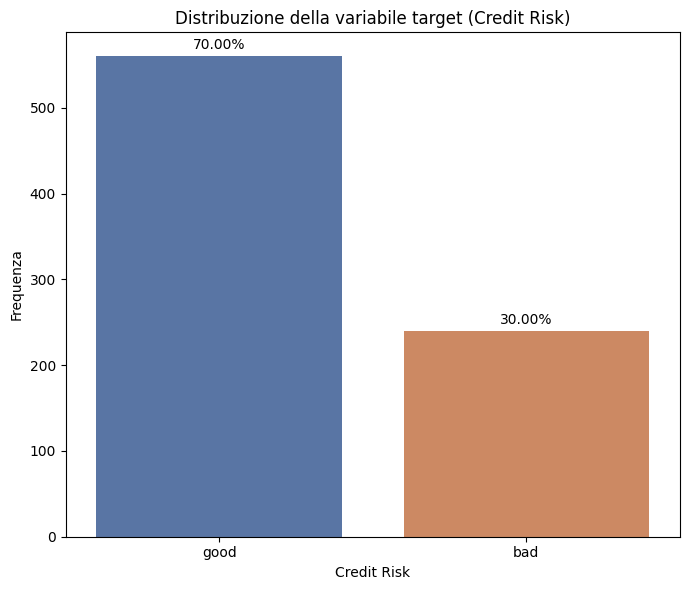

,Frequency,Percentage
Credit_risk,,
good,560,70.0
bad,240,30.0


In [ ]:
def plot_target_distribution(y):
    """
    Plots the distribution of the target variable showing counts and percentages.

    Args:
        y: Series containing the target variable
    """
    # Calculate the frequency and percentage for each class
    frequency = y.value_counts()
    percentage = y.value_counts(normalize=True) * 100

    # Create a DataFrame to visualize the results
    freq_percent_df = pd.DataFrame({'Frequency': frequency, 'Percentage': percentage})

    # Plotting
    plt.figure(figsize=(7, 6))
    sns.countplot(x=y, hue=y, order=['good','bad'], palette=['#4c72b0','#dd8452'])

    # Add percentages to the graph
    for i, (freq, perc) in enumerate(zip(freq_percent_df['Frequency'], freq_percent_df['Percentage'])):
        plt.text(i, freq + 5, f'{perc:.2f}%', ha='center', va='bottom')

    plt.title('Distribuzione della variabile target (Credit Risk)')
    plt.xlabel('Credit Risk')
    plt.ylabel('Frequenza')
    plt.tight_layout()
    plt.show()

    return freq_percent_df

# Call the function to analyze the distribution of the target variable in the training set
freq_percent_df = plot_target_distribution(y_train)
display(freq_percent_df)

In [ ]:
def plot_feature_analysis(df, col, target_col):
    """
    Crea istogramma, distribuzione normalizzata e boxplot per una colonna,
    suddivisi per il valore del target.

    Args:
        df: DataFrame.
        col: Nome della colonna da analizzare.
        target_col: Nome della colonna target.
    """
    plt.figure(figsize=(18, 6))

    # Istogramma
    plt.subplot(1, 3, 1)
    if df[col].dtype == 'object':  # Se è categorica
      #Uso un countplot invece di un istogramma
      ax1 = sns.countplot(data=df, x=col, hue=target_col, palette=['#4c72b0','#dd8452'])
      plt.xticks(rotation=45, ha="right")  # Ruota le etichette per leggibilità
      countplot_categories_order = [t.get_text() for t in ax1.get_xticklabels()]
    else:
      sns.histplot(data=df, x=col, hue=target_col, kde=False) #kde=False per non avere la stima della densita'
    plt.title(f'Istogramma di {col}')

    # Distribuzione normalizzata
    plt.subplot(1, 3, 2)
    if df[col].dtype != 'object':
        for label in df[target_col].unique():
            sns.kdeplot(df.loc[df[target_col] == label, col], label=label, fill=True) #fill=True riempe sotto la curva
        plt.title(f'Distribuzione Normalizzata di {col}')
        plt.legend()
    else:
        dist = df.groupby(col)[target_col].value_counts(normalize=True).unstack().fillna(0)
        dist = dist.reindex(countplot_categories_order)
        dist.plot(kind='bar', stacked=True,ax=plt.gca(), label=target_col, color=['#dd8452','#4c72b0'])
        plt.title(f'Distribuzione Normalizzata di {col}')
        plt.xticks(rotation=45, ha="right")
        plt.legend()

    # Boxplot (numeriche)
    if df[col].dtype != 'object':
        plt.subplot(1, 3, 3)
        sns.boxplot(x=target_col, y=col, data=df, hue=target_col, palette=['#c6dcec','#ffdec2'])
        plt.title(f'Boxplot di {col}')


    plt.tight_layout()
    plt.show()

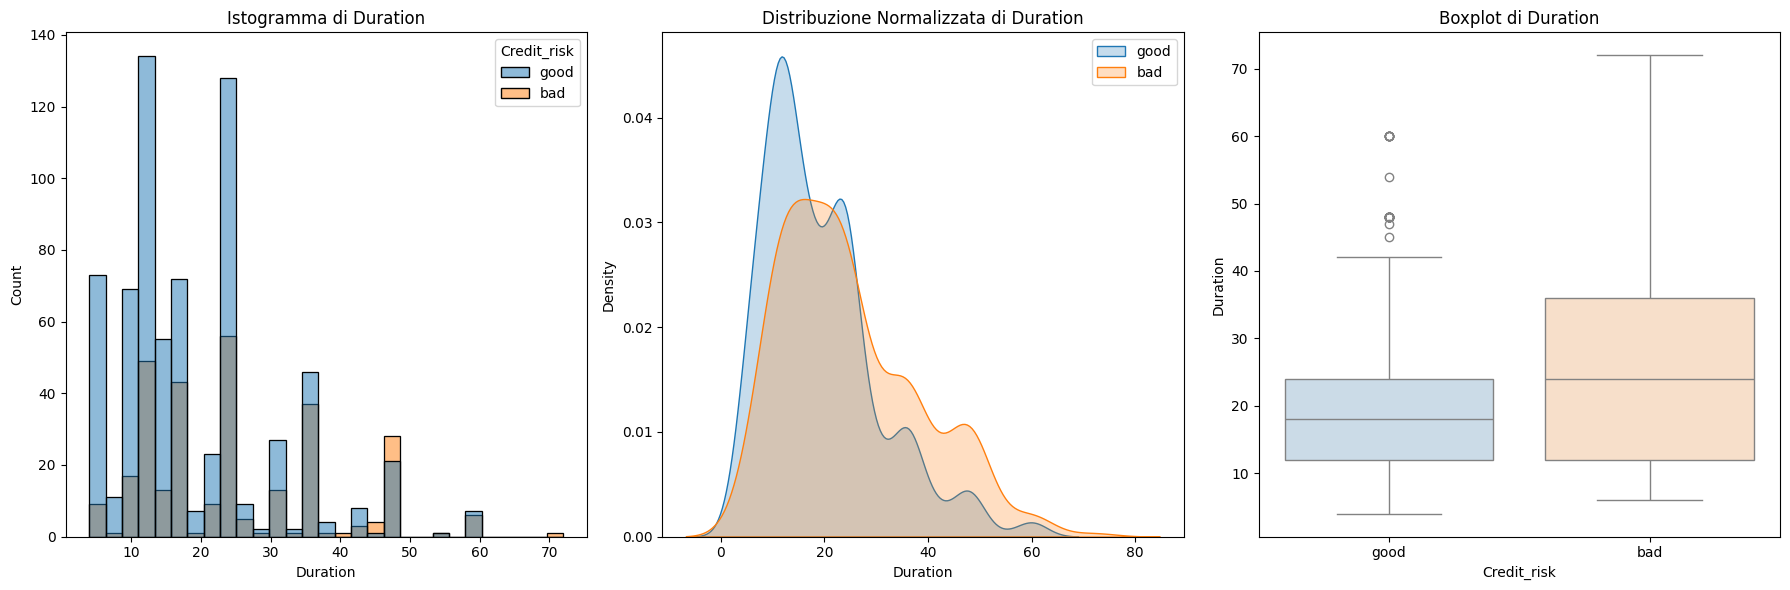

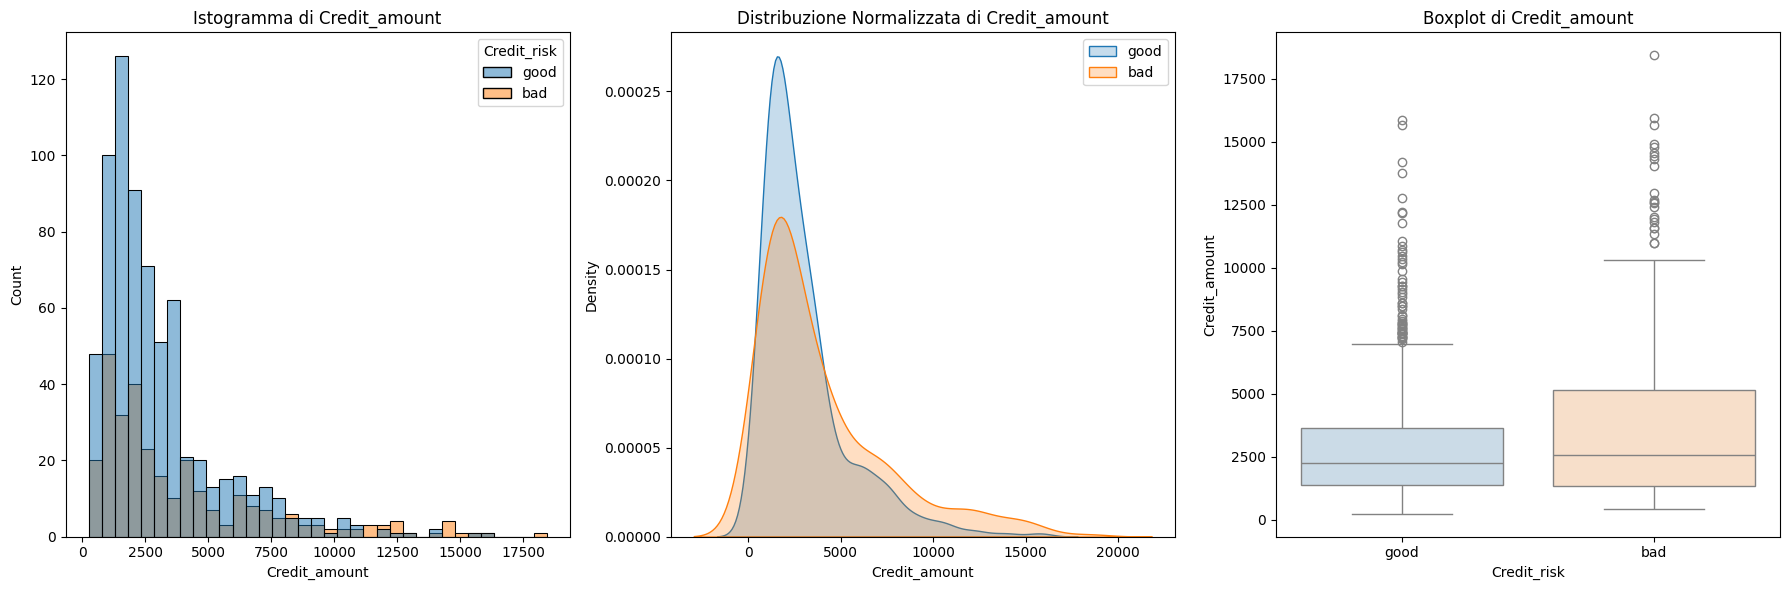

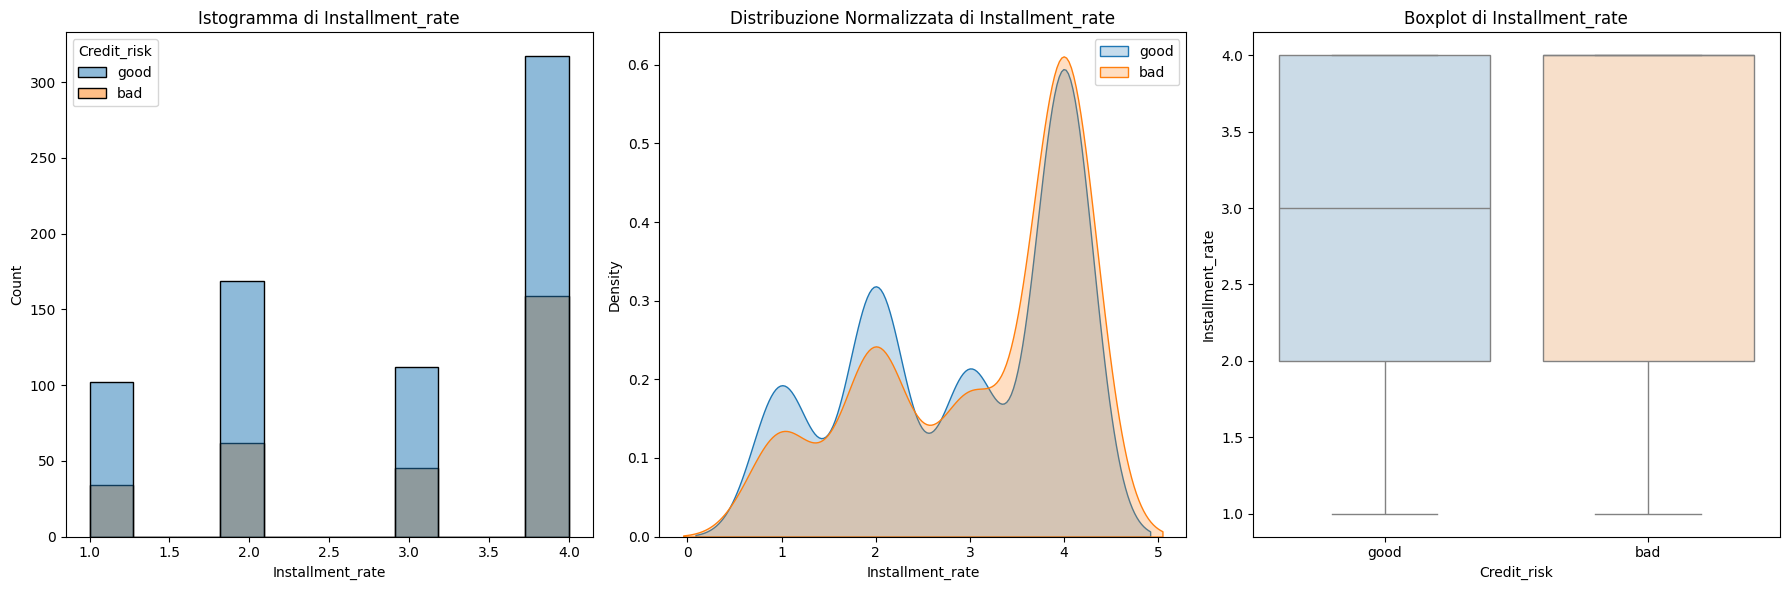

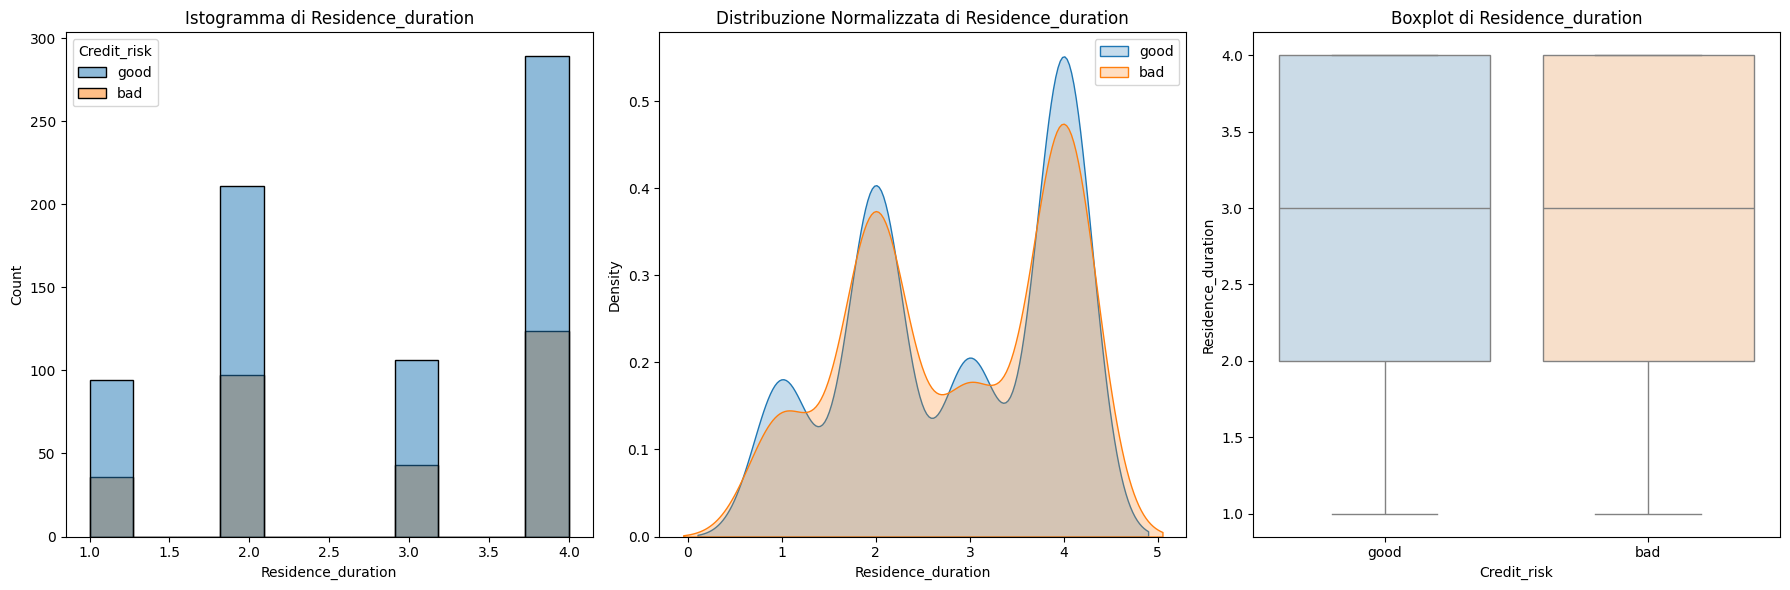

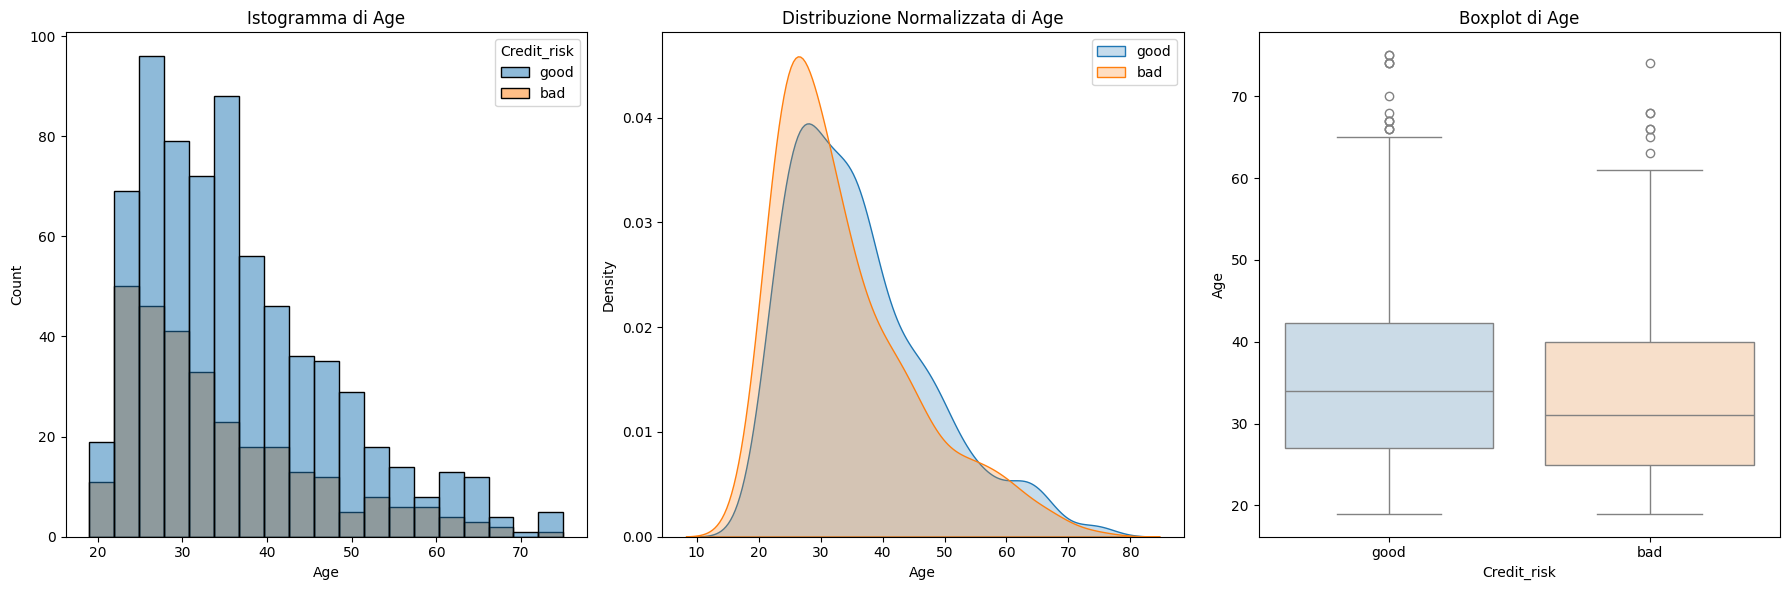

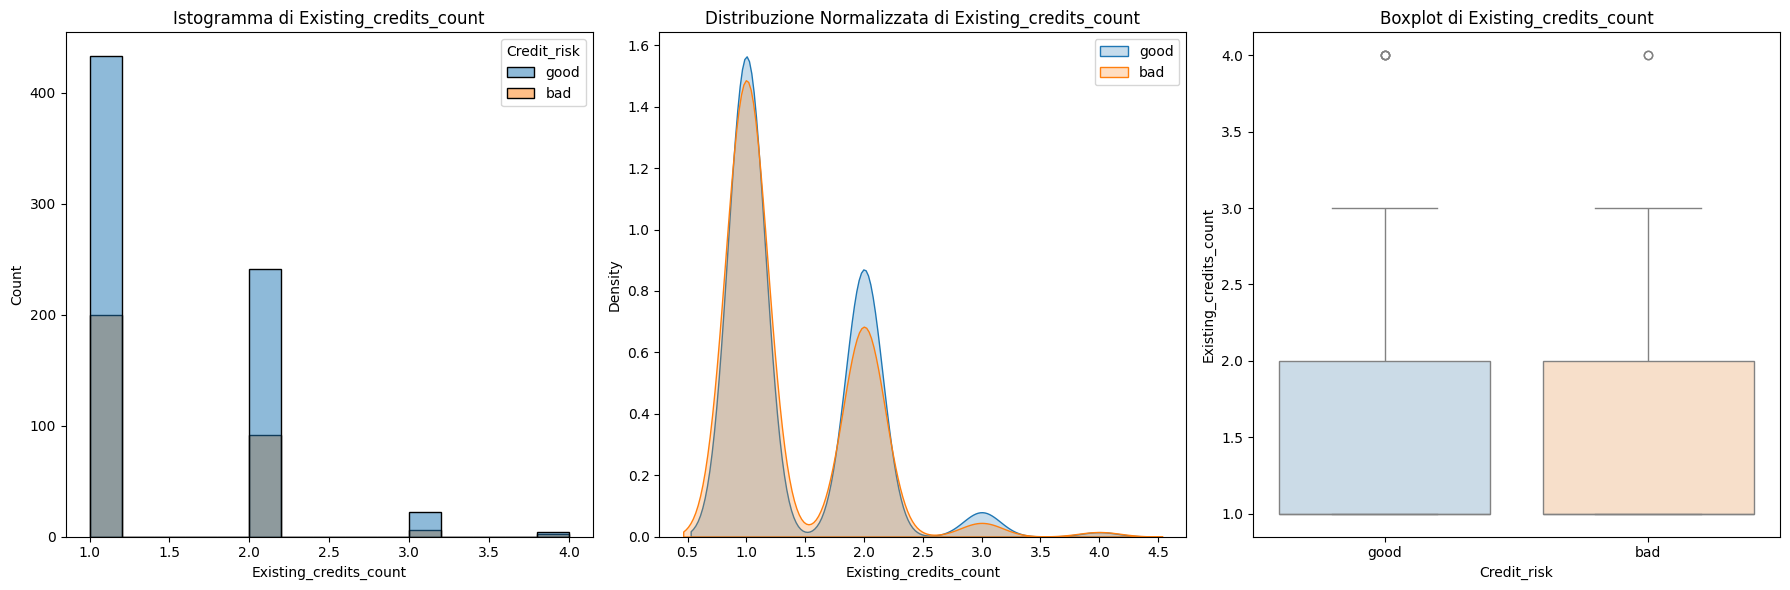

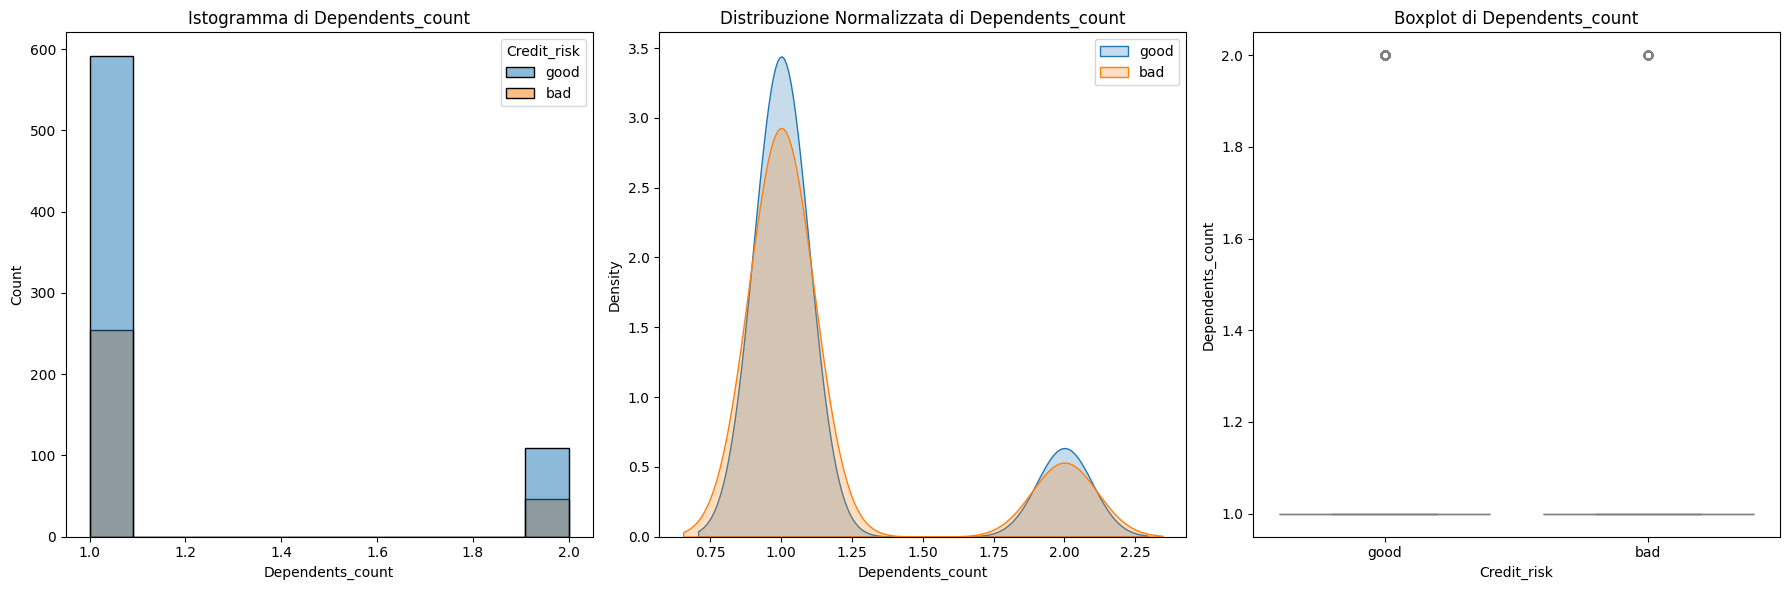

In [ ]:
# Grafici per variabili numeriche
for col in numerical_cols:
    plot_feature_analysis(data, col, target_col)

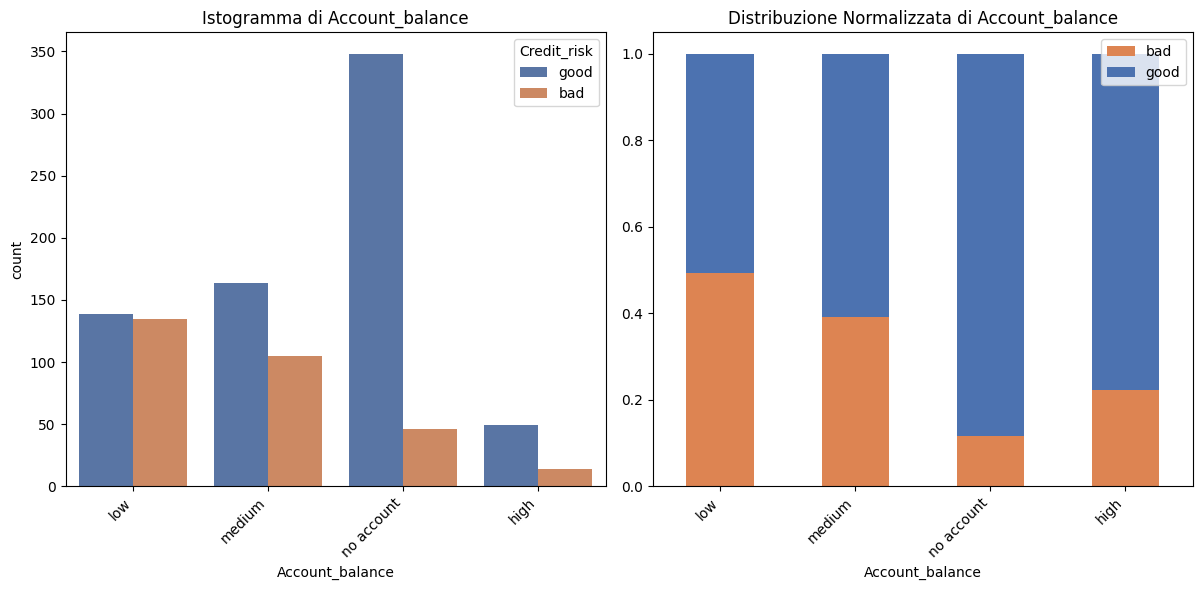

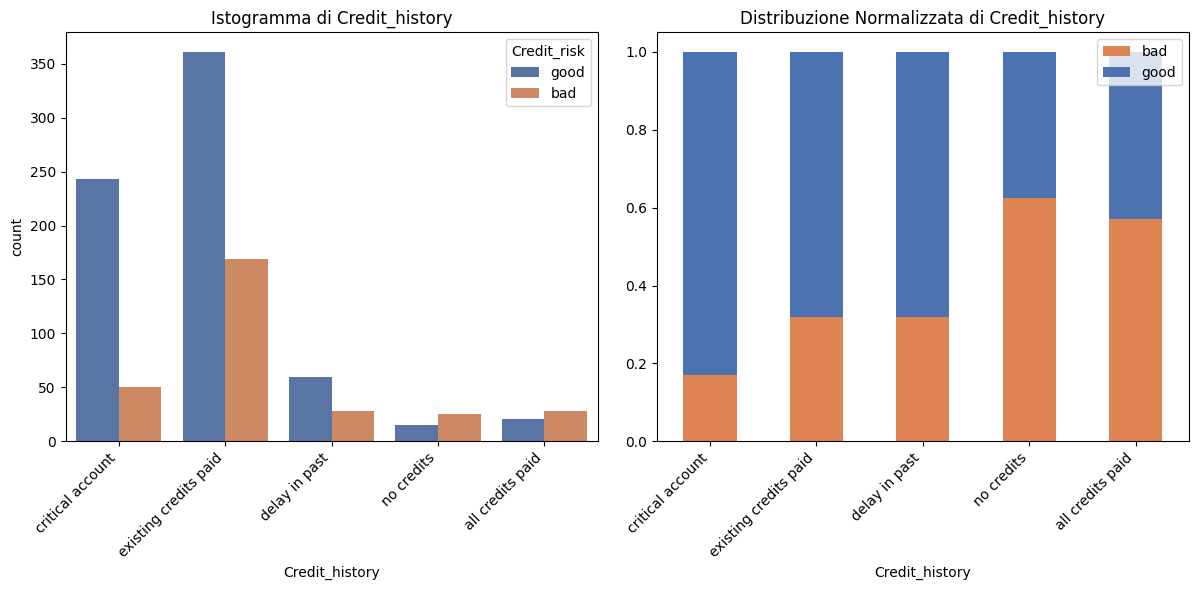

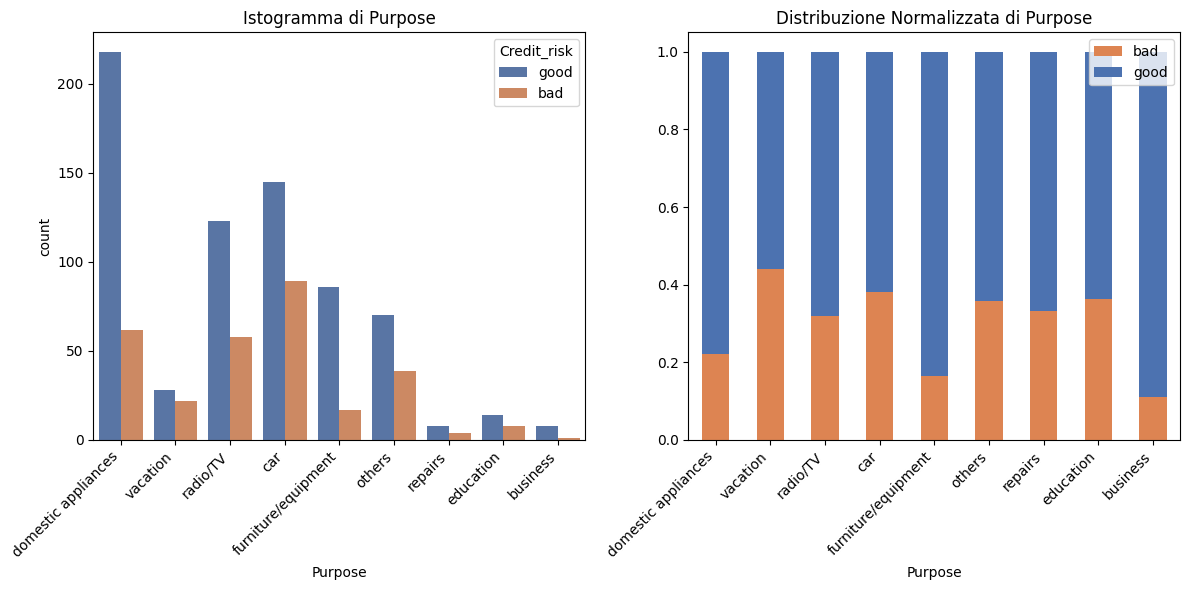

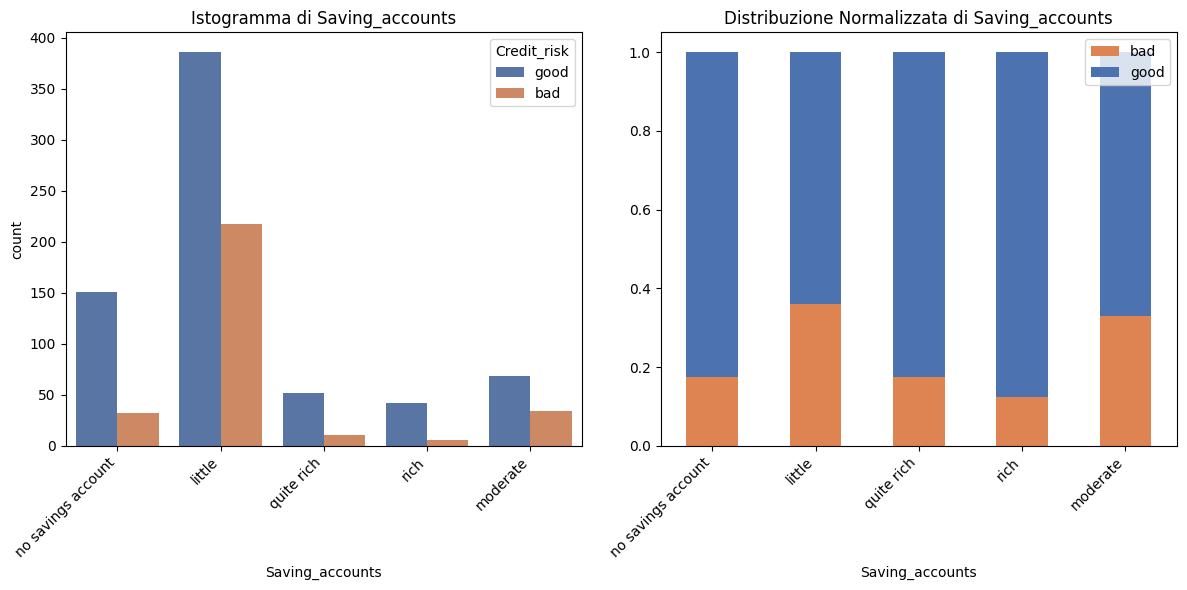

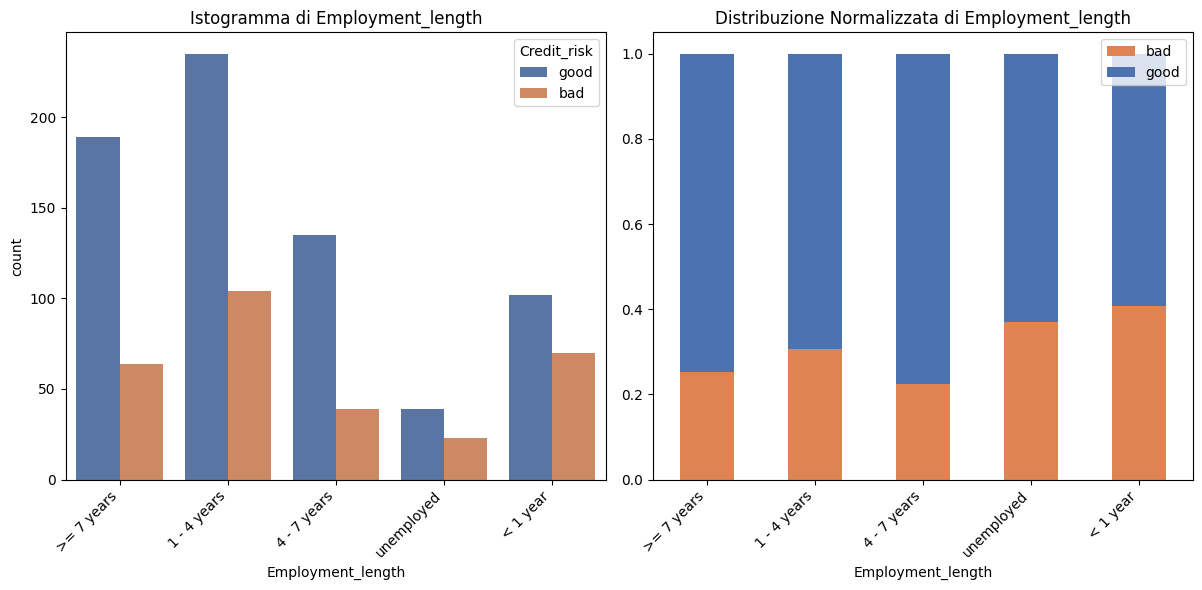

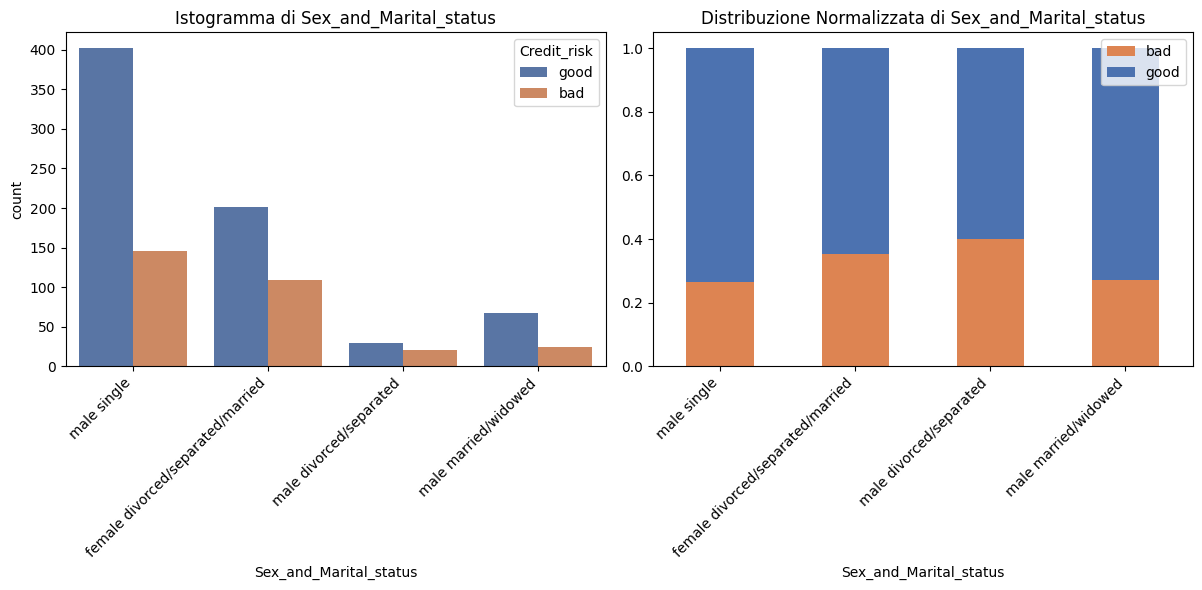

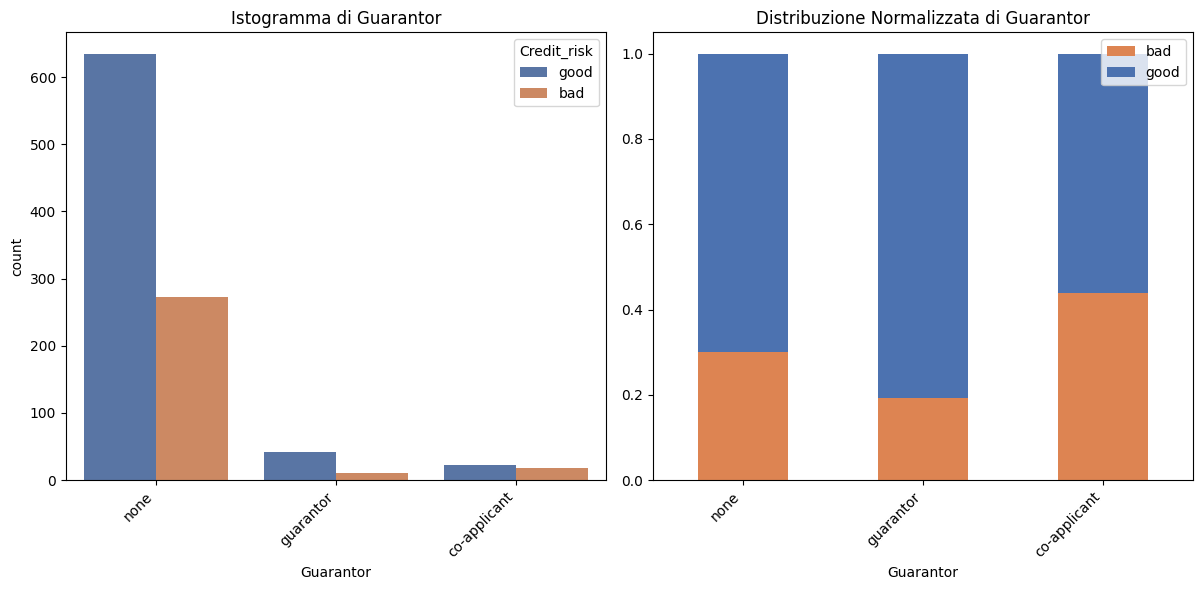

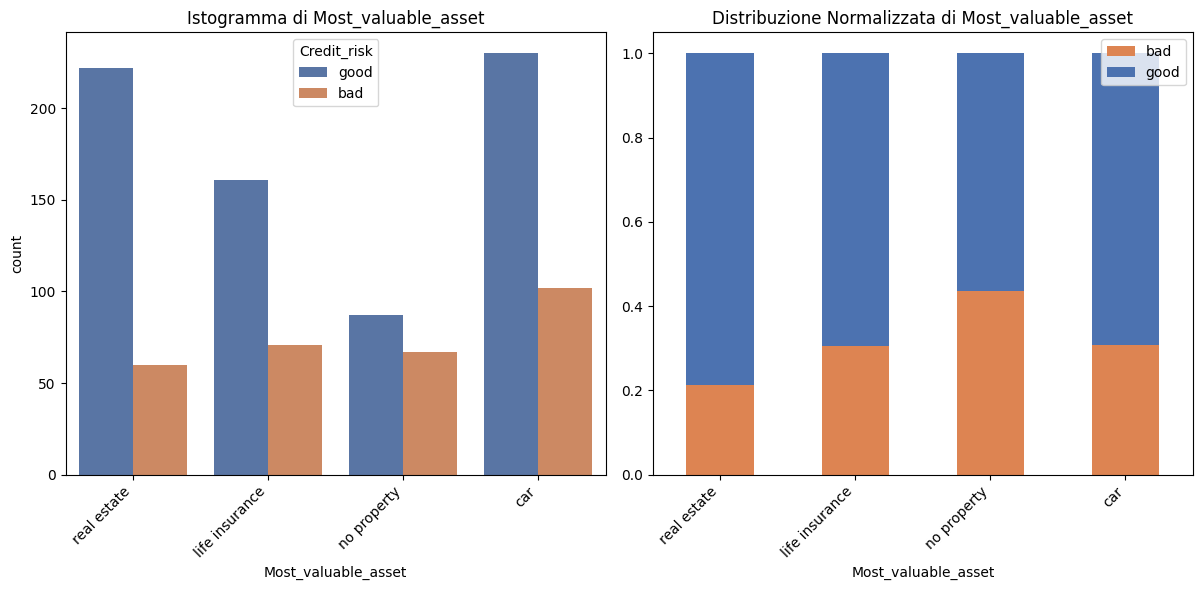

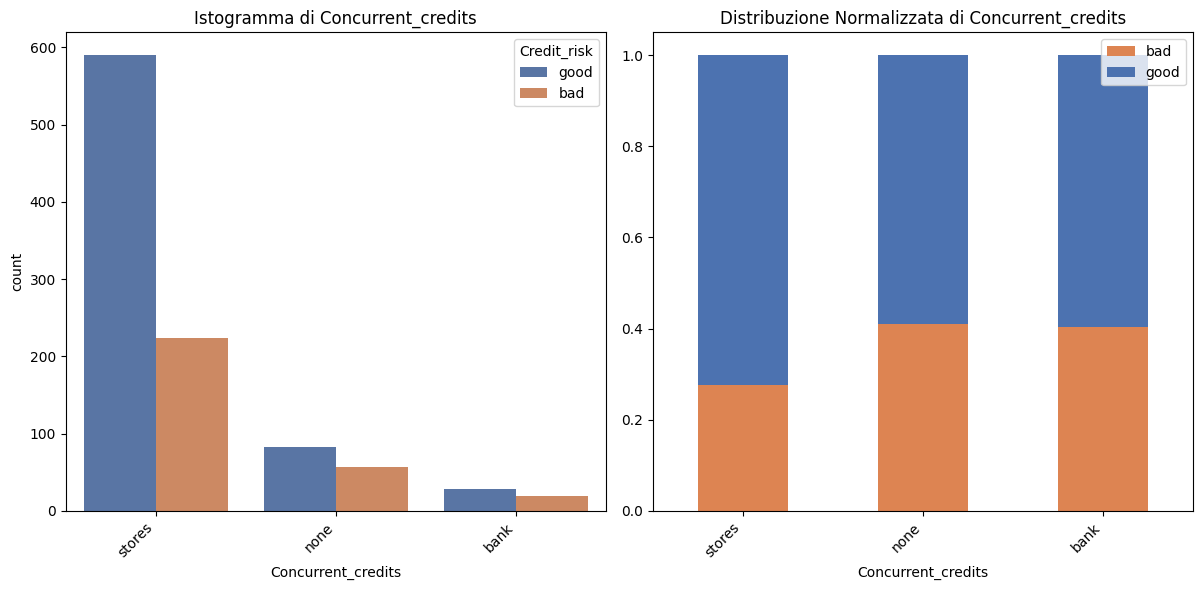

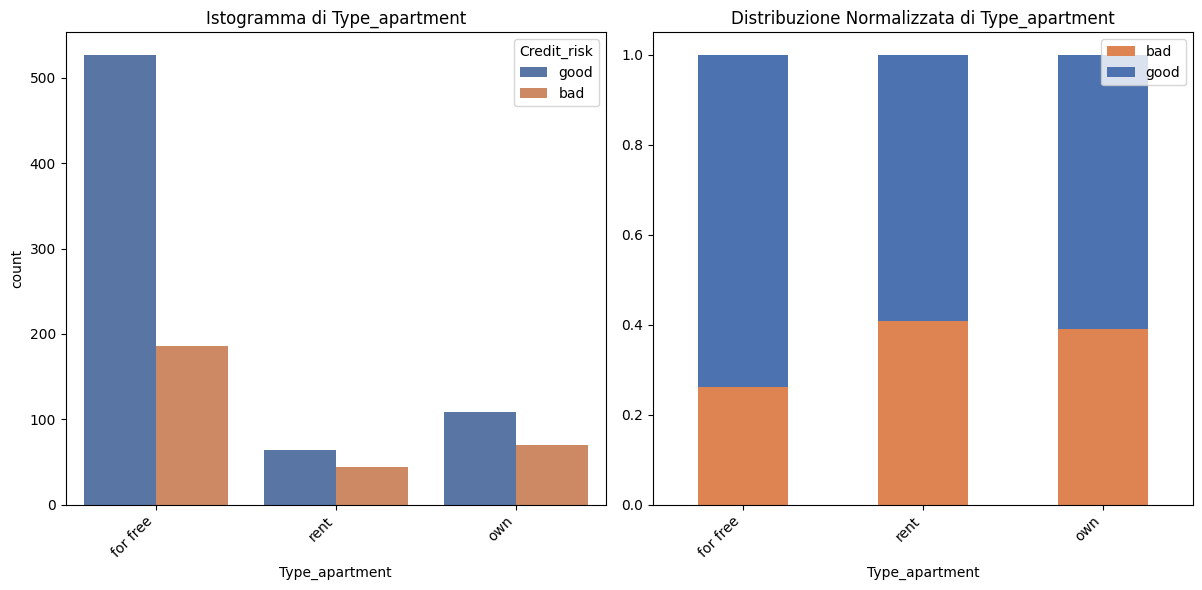

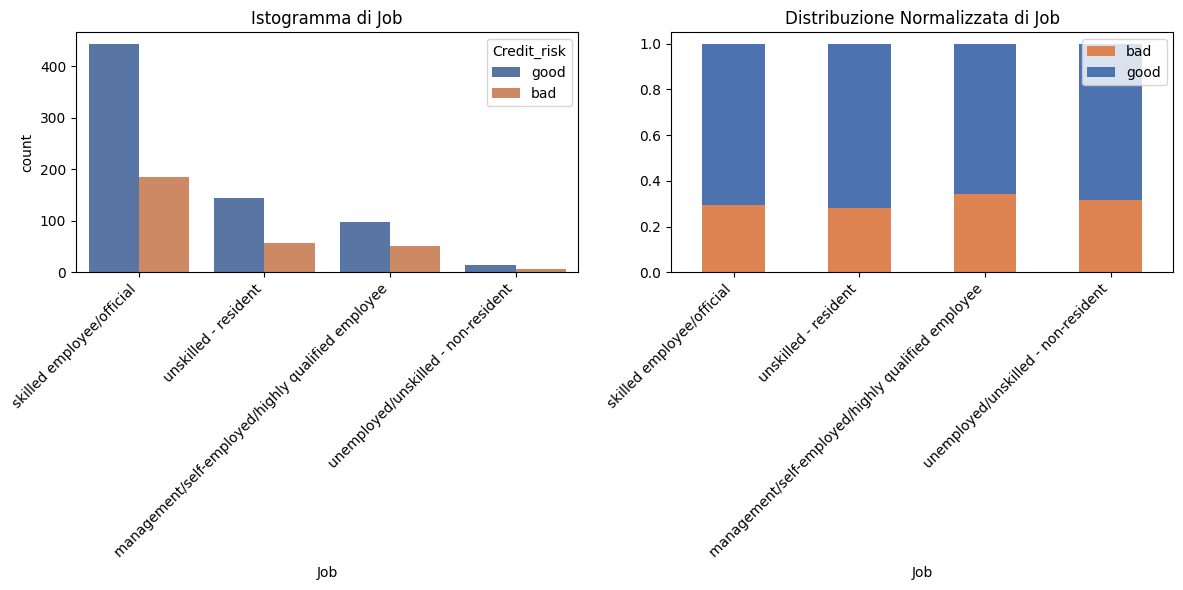

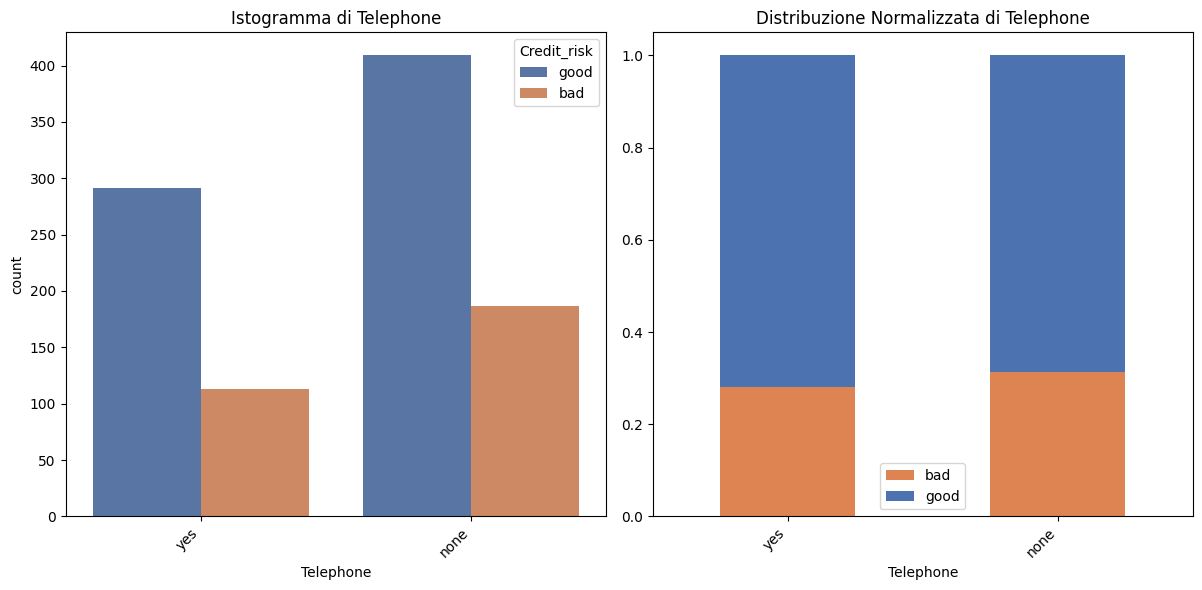

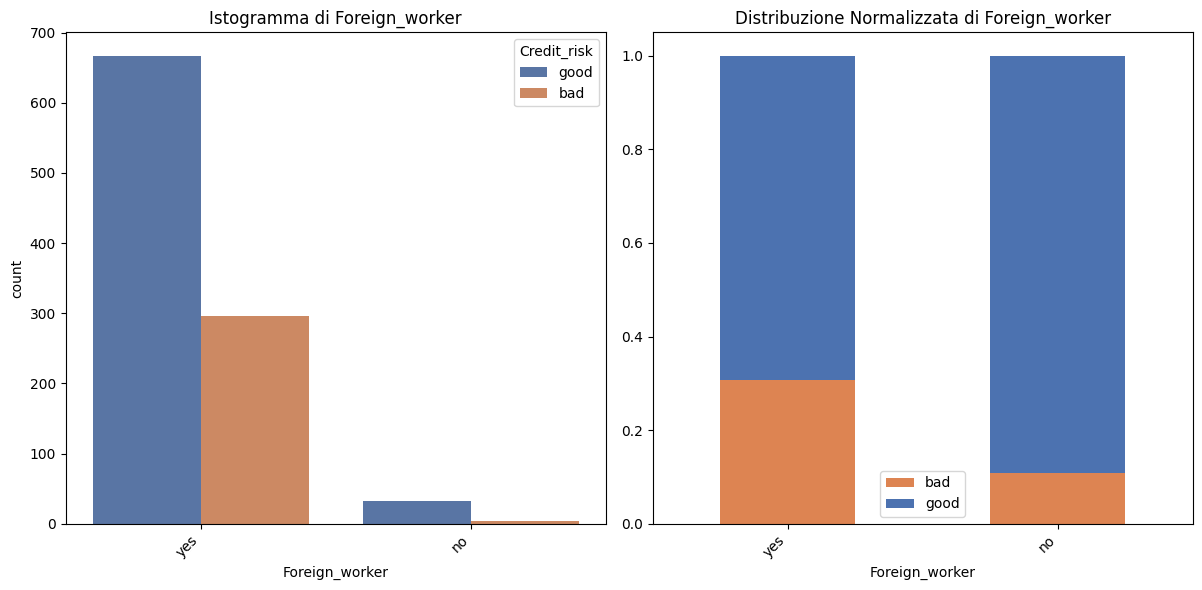

In [ ]:
# Grafici per variabili categoriche
for col in categorical_cols:
    plot_feature_analysis(data, col, target_col=target_col)

#### 3.3.3 Relazioni tra le variabili, pattern, potenziali problemi

**Scatter Plot Matrix (Pair Plot):**

*   *Come:* L'abbiamo già visto, `sns.pairplot(df)`, ma è utile *ripeterlo* dopo aver fatto eventuali trasformazioni (es. logaritmo) e *prima* di standardizzare/normalizzare.  Se hai troppe variabili numeriche, seleziona solo quelle più promettenti o quelle che vuoi investigare ulteriormente.

*   *Cosa cercare:*
    *   **Relazioni non lineari:** Se vedi curve, "U", "V", o altre forme, la correlazione lineare (Pearson) non catturerà la relazione. Potresti aver bisogno di:
        *   Trasformare le variabili (es. log, sqrt, polinomiale).
        *   Creare *feature* di interazione (es. moltiplicare due variabili).
        *   Usare modelli non lineari (es. alberi decisionali, SVM, reti neurali).
    *   **Cluster:** Se vedi gruppi distinti di punti, potrebbe essere utile usare un algoritmo di clustering (es. K-Means) per creare una nuova variabile categorica che identifica questi gruppi.
    *   **Outlier bivariati:** Punti che sono outlier *rispetto alla relazione tra due variabili*, anche se non sono outlier per le singole variabili.
*   **Scatter Plot con Hue (per variabili categoriche):**
    *   *Come:*  Aggiungi l'argomento `hue='variabile_categorica'` a `sns.scatterplot()`.
    *   *Cosa cercare:* Come la relazione tra due variabili numeriche cambia al variare della categoria.  Questo può rivelare interazioni importanti.
*   **Box Plot (o Violin Plot) per Variabili Numeriche *suddivise per Categoria*:**
    *   *Come:*  `sns.boxplot(x='variabile_categorica', y='variabile_numerica', data=df)`.  Usa `sns.violinplot()` per una visualizzazione ancora più dettagliata.
    *   *Cosa cercare:* Come la distribuzione di una variabile numerica cambia al variare della categoria.
    * Esempio pratico per il dataset: `sns.boxplot(x='Credit_history', y='Credit_amount', data=data, hue='Credit_risk')` Questo ti permette di vedere, per ogni categoria di `Credit_history`, come varia la distribuzione di `Credit_amount` tra i buoni e i cattivi pagatori.

**3. Potenziali Problemi:**

*   **Collinearità (Multicollinearità):** Forte correlazione *tra variabili predittive* (non con la variabile target).  Questo può rendere instabile l'addestramento di modelli lineari e reti neurali.
    *   *Come individuarla:* Matrice di correlazione (valori vicini a +1 o -1), pair plot, Variance Inflation Factor (VIF).
    *   *Soluzioni:*
        *   Rimuovere una delle variabili correlate.
        *   Combinare le variabili correlate in una nuova feature (es. PCA).
        *   Usare tecniche di regolarizzazione (es. Ridge, Lasso).
*   **Data Leakage:** Quando informazioni sul futuro (o sulla variabile target) sono "trapelate" nelle variabili predittive.  Questo porta a performance *troppo buone* durante l'addestramento, ma *scarse* nella realtà.
    *   *Esempio:* Includere una variabile come "data di cancellazione dell'abbonamento" quando si vuole prevedere se un cliente abbandonerà il servizio.
    *   *Come individuarlo:* Pensare attentamente al significato di ogni variabile e al momento in cui viene raccolta.  Cercare correlazioni *troppo alte* con la variabile target.
    *   *Soluzioni:* Rimuovere la variabile problematica.
*  **Distribuzione diversa tra training e test set (dataset shift):** Se il training set e il test set (o i dati futuri) hanno distribuzioni *molto* diverse per alcune variabili, il modello potrebbe non generalizzare bene. Ad esempio: addestro un modello con dati di clienti di eta' media 40 anni, ma poi lo uso con clienti di eta' media 20.
    * *Come individuarlo:* Confrontare le distribuzioni delle variabili tra training e test set (istogrammi, KDE).
    *   *Soluzioni:*
        *   Raccogliere dati più rappresentativi.
        *   Usare tecniche di *domain adaptation*.
*   **Bias nei dati:** Se i dati riflettono pregiudizi esistenti (es. bias di genere o razziali), il modello potrebbe perpetuare questi pregiudizi.
    *   *Come individuarlo:* Analizzare le distribuzioni delle variabili sensibili e le performance del modello su diversi sottogruppi.
    *   *Soluzioni:*
        *   Raccogliere dati più bilanciati.
        *   Usare tecniche di *fairness-aware machine learning*.

In [ ]:
def plot_scatterplot(data, x, y, target_col):
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=data, x=x, y=y, hue=target_col)
    plt.title(f'Scatter Plot: {x} vs {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

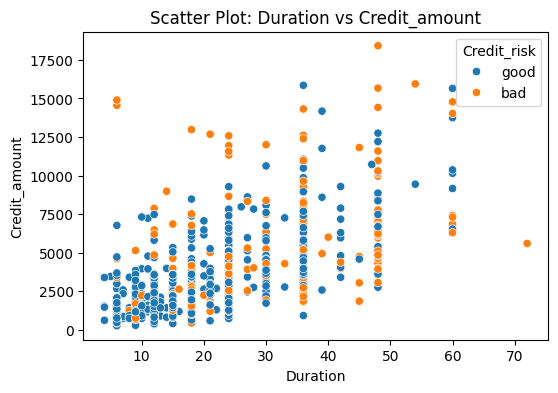

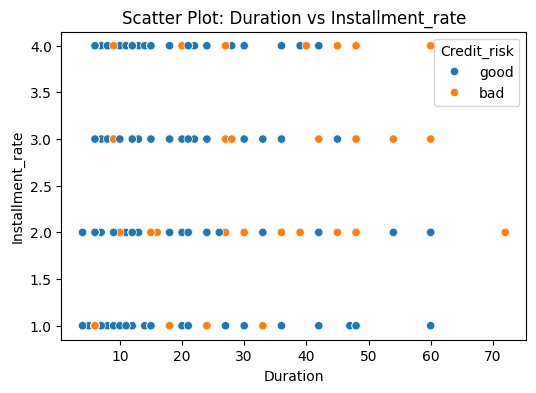

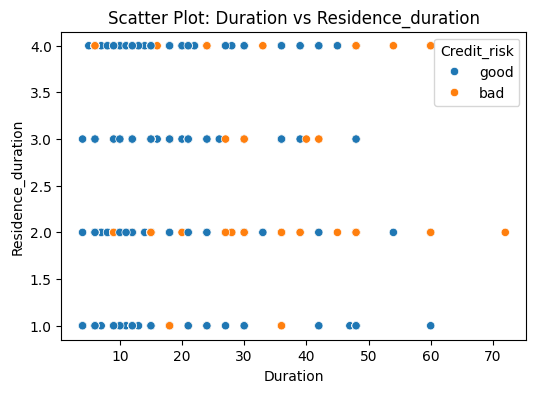

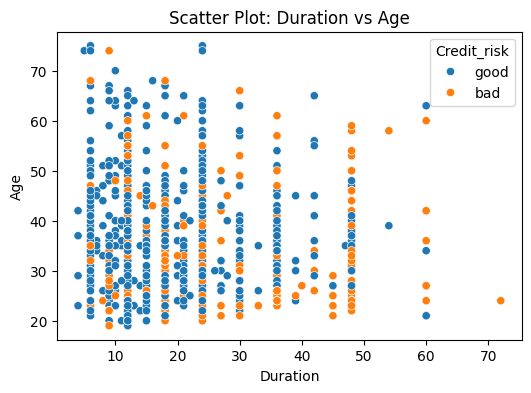

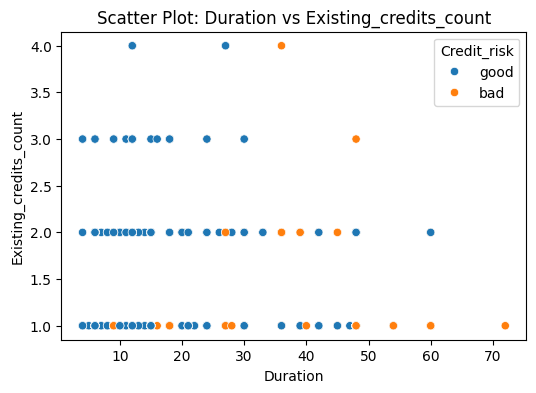

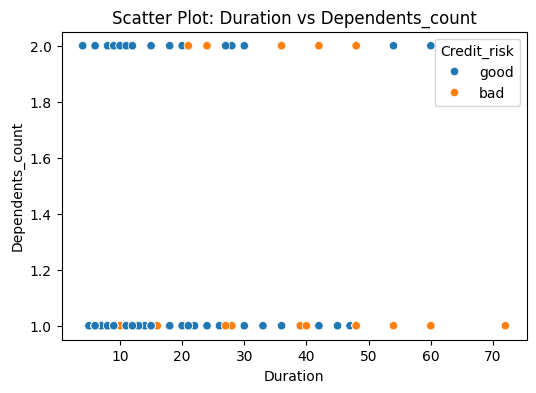

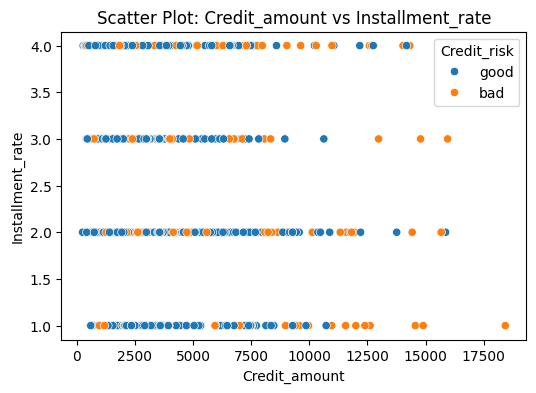

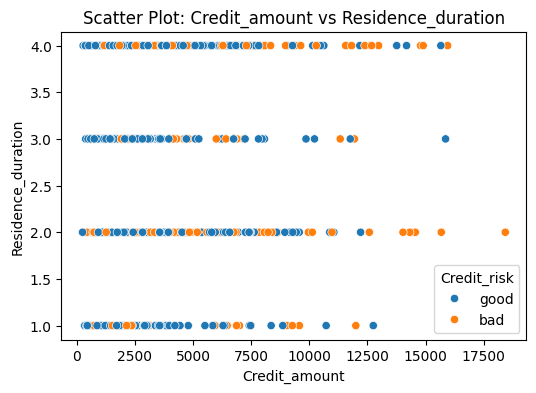

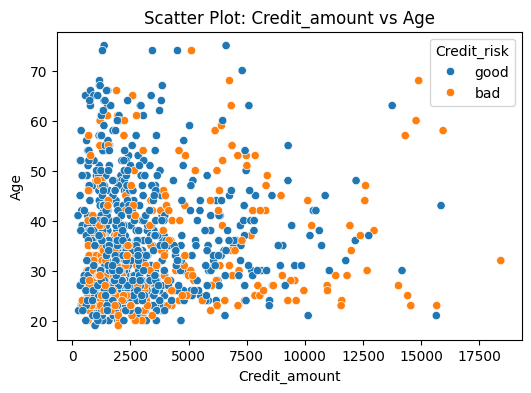

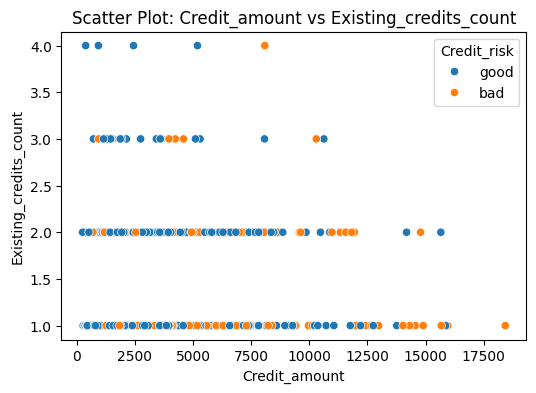

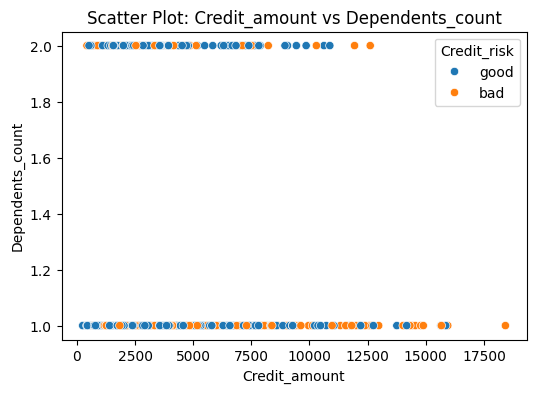

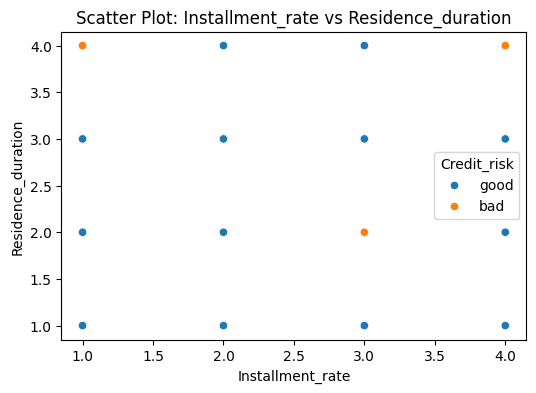

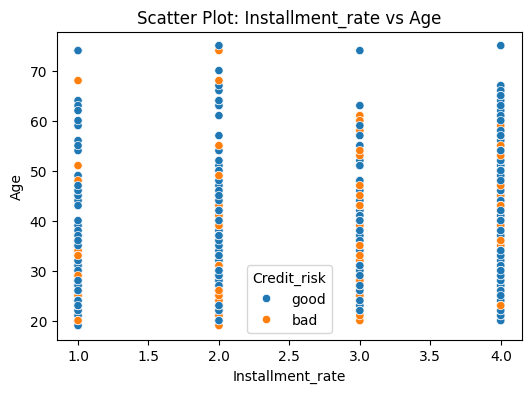

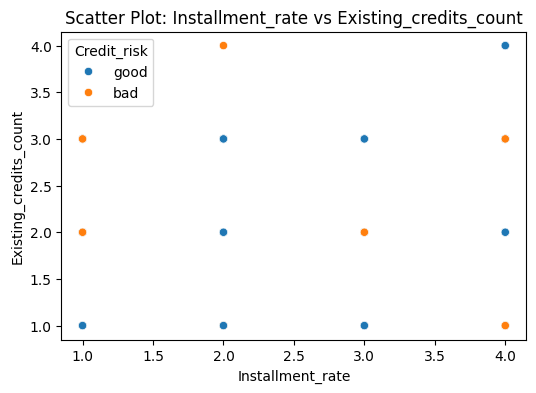

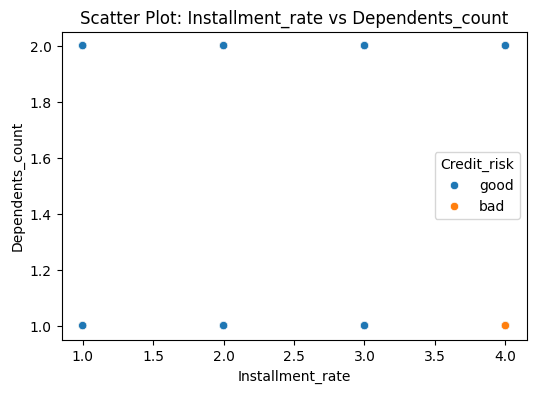

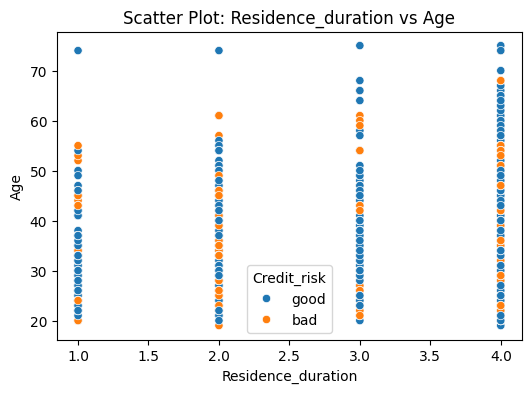

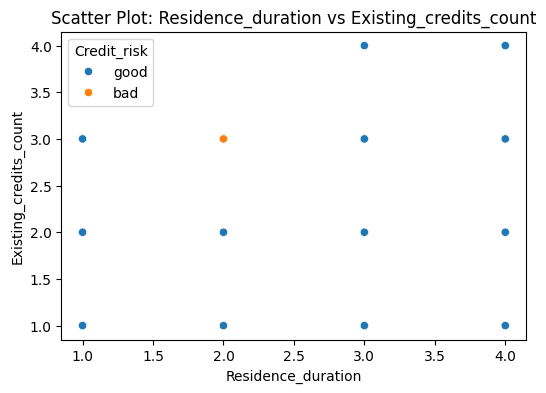

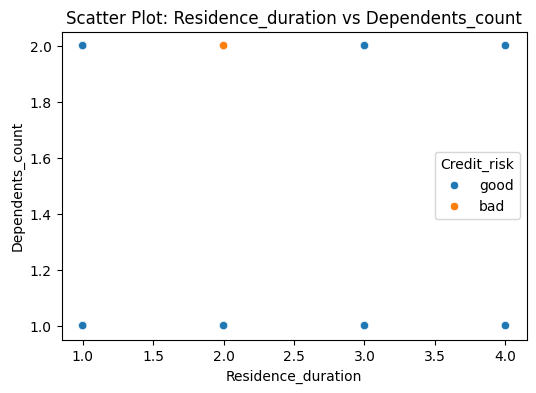

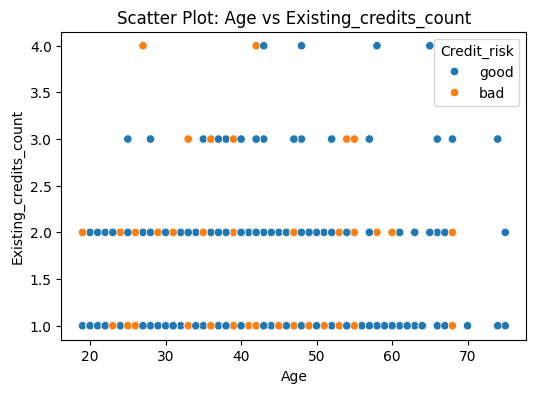

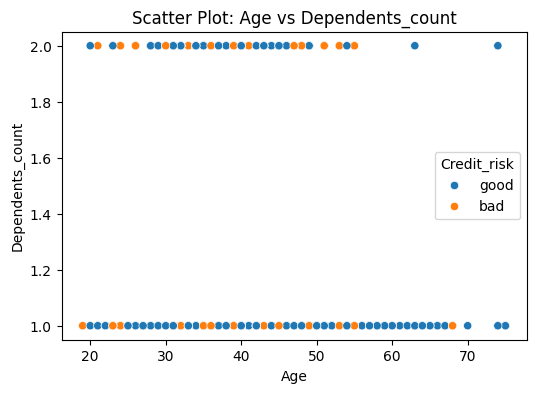

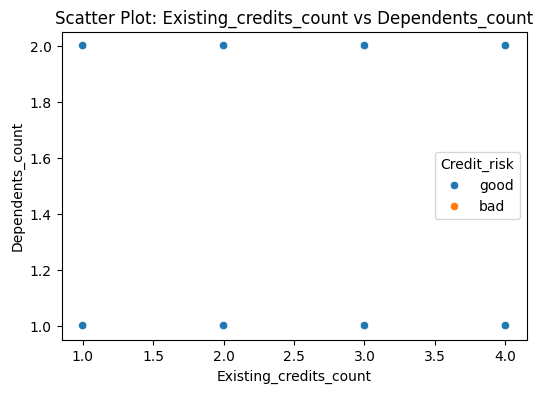

In [ ]:
import itertools

numerical_datas = data.select_dtypes(include=[np.number])
features = numerical_datas.columns.drop(target_col, errors='ignore') #Prendi TUTTE le colonne, esclusa la target

# Genera tutte le combinazioni di coppie di feature
for x, y in itertools.combinations(features, 2):
    plot_scatterplot(data, x, y, target_col)

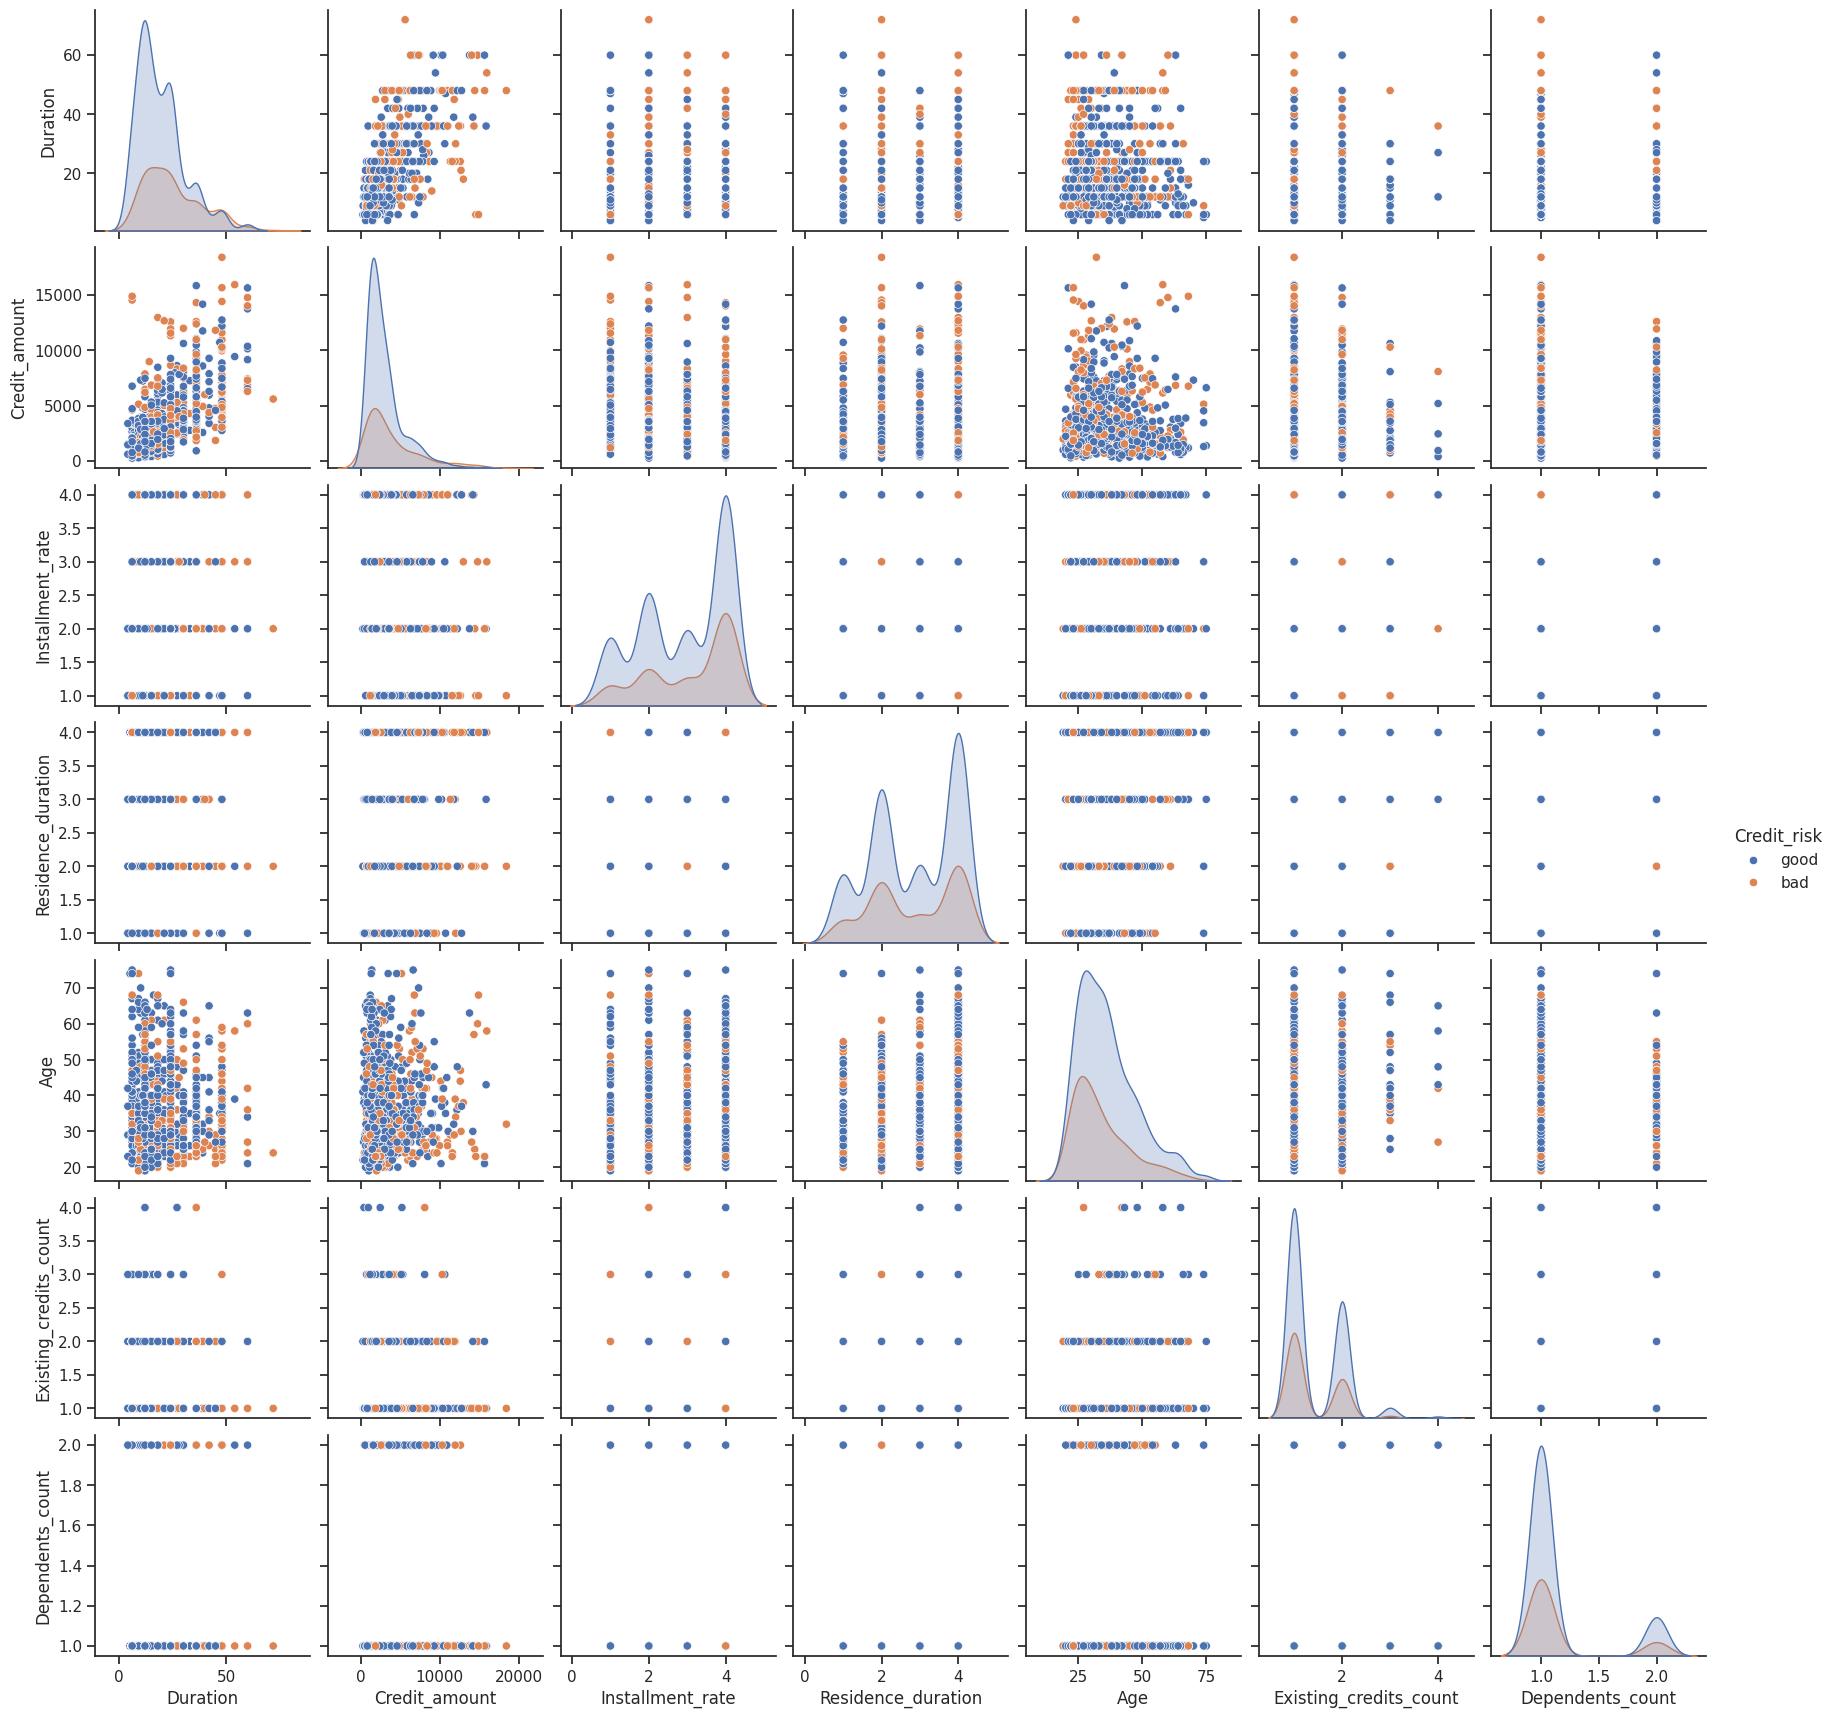

In [ ]:
sns.set_theme(style="ticks")
sns.pairplot(data, hue=target_col)

## 3.2 Preparazione dei Dati (Pre-processing)
--------------

#### 3.2.1 Data Cleaning

La trasformazione logaritmica di `Credit_amount` e `Duration` ha quasi ridotto del tutto la presenza degli outlier e ha reso le distribuzioni più simmetiche.

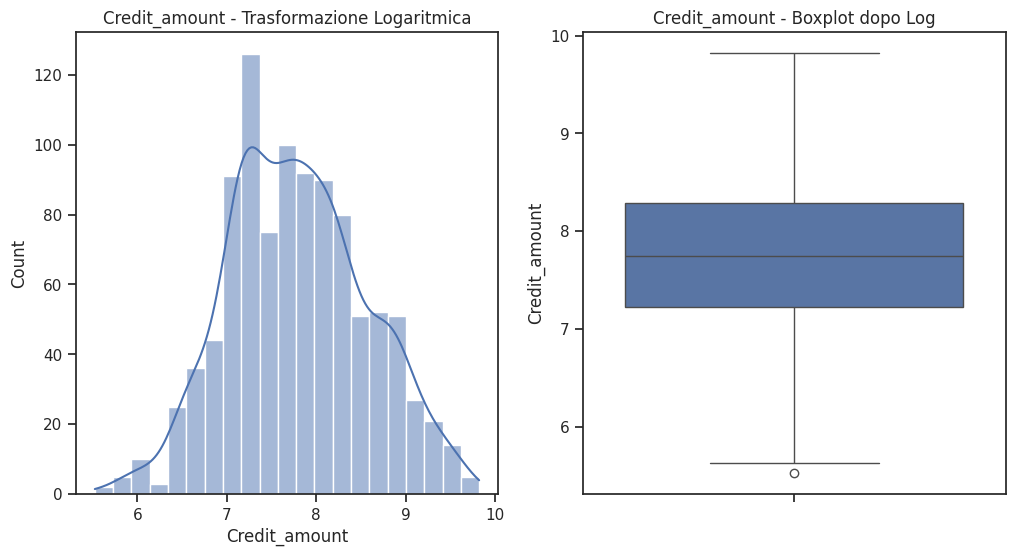

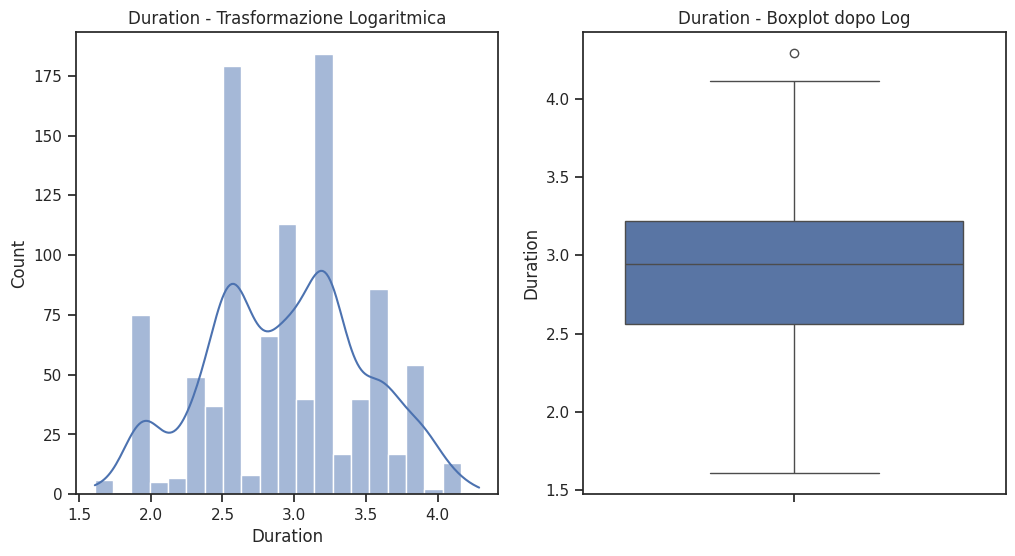

In [ ]:
data_cleaning = data.copy()

# Trasformazione logaritmica per 'Credit_amount' e 'Duration'
data_cleaning['Credit_amount'] = np.log1p(data_cleaning['Credit_amount'])
data_cleaning['Duration'] = np.log1p(data_cleaning['Duration'])

"""
# Winsorizzazione per 'Age'
# Aspetto a rimuovere gli outliers. Prima addestro un modello, poi lo valuto con il validation set e successivamente lo raffino in modo iterativo.
# data_cleaning['Age_winsorized'] = mstats.winsorize(data_cleaning['Age'], limits=[0.05, 0.05])

# data['Age'] = data['Age'].clip(upper=data['Age'].quantile(0.995))
#
# Binning per 'Age'
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
data_cleaning['Age_binned'] = pd.cut(data_cleaning['Age'], bins=bins, labels=labels, right=False)
"""

## Credit_amount
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(data_cleaning['Credit_amount'], kde=True, ax=axes[0])
axes[0].set_title('Credit_amount - Trasformazione Logaritmica')
sns.boxplot(y=data_cleaning['Credit_amount'], ax=axes[1])
axes[1].set_title('Credit_amount - Boxplot dopo Log')
plt.show()

## Duration
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(data_cleaning['Duration'], kde=True, ax=axes[0])
axes[0].set_title('Duration - Trasformazione Logaritmica')
sns.boxplot(y=data_cleaning['Duration'], ax=axes[1])
axes[1].set_title('Duration - Boxplot dopo Log')
plt.show()


In [ ]:
from sklearn.pipeline import FunctionTransformer


def log_transform(x):
    return np.log1p(x)

def get_feature_names_log(estimator, feature_names_in=None):
    if feature_names_in is None:
        return ['log_' + col for col in estimator.feature_names_in_]
    else:
        return ['log_' + col for col in feature_names_in]


log_transformer = FunctionTransformer(log_transform, feature_names_out=get_feature_names_log)

In [ ]:
drop_cols = ['Telephone']
categorical_cols = [col for col in categorical_cols if col not in drop_cols]
numerical_cols = [col for col in numerical_cols if col not in drop_cols]
ordinal_cols = [col for col in ordinal_cols if col not in drop_cols]
nominal_cols = [col for col in nominal_cols if col not in drop_cols]

for col in drop_cols:
    if col in X_train: X_train.drop(col, axis=1, inplace=True)
    if col in X_test: X_test.drop(col, axis=1, inplace=True)

print(categorical_cols)
print(ordinal_cols)
display(X_train)
display(X_test)

['Account_balance', 'Credit_history', 'Purpose', 'Saving_accounts', 'Employment_length', 'Sex_and_Marital_status', 'Guarantor', 'Most_valuable_asset', 'Concurrent_credits', 'Type_apartment', 'Job', 'Foreign_worker']
['Employment_length', 'Saving_accounts', 'Account_balance', 'Credit_history']


,Account_balance,Duration,Credit_history,Purpose,Credit_amount,Saving_accounts,Employment_length,Installment_rate,Sex_and_Marital_status,Guarantor,Residence_duration,Most_valuable_asset,Age,Concurrent_credits,Type_apartment,Existing_credits_count,Job,Dependents_count,Foreign_worker
675,no account,30,critical account,domestic appliances,4530,little,4 - 7 years,4,female divorced/separated/married,none,4,car,26,stores,own,1,management/self-employed/highly qualified empl...,1,yes
703,medium,30,delay in past,others,2503,moderate,>= 7 years,4,male single,none,2,life insurance,41,bank,for free,2,skilled employee/official,1,yes
12,medium,12,existing credits paid,domestic appliances,1567,little,1 - 4 years,1,female divorced/separated/married,none,1,car,22,stores,for free,1,skilled employee/official,1,yes
845,medium,21,existing credits paid,radio/TV,3976,no savings account,4 - 7 years,2,male single,none,3,car,35,stores,for free,1,skilled employee/official,1,yes
795,no account,9,existing credits paid,radio/TV,2301,moderate,< 1 year,2,female divorced/separated/married,none,4,life insurance,22,stores,own,1,skilled employee/official,1,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,medium,24,critical account,car,3878,moderate,< 1 year,4,male divorced/separated,none,2,car,37,stores,for free,1,skilled employee/official,1,yes
169,medium,24,critical account,others,1935,little,>= 7 years,4,male divorced/separated,none,4,real estate,31,stores,for free,2,skilled employee/official,1,yes
856,no account,10,existing credits paid,business,894,no savings account,4 - 7 years,4,female divorced/separated/married,none,3,life insurance,40,stores,for free,1,skilled employee/official,1,yes
655,low,14,existing credits paid,car,3973,little,unemployed,1,male single,none,4,no property,22,stores,rent,1,skilled employee/official,1,yes


,Account_balance,Duration,Credit_history,Purpose,Credit_amount,Saving_accounts,Employment_length,Installment_rate,Sex_and_Marital_status,Guarantor,Residence_duration,Most_valuable_asset,Age,Concurrent_credits,Type_apartment,Existing_credits_count,Job,Dependents_count,Foreign_worker
977,medium,18,delay in past,others,2427,no savings account,>= 7 years,4,male single,none,2,life insurance,42,stores,for free,2,skilled employee/official,1,yes
735,medium,36,all credits paid,repairs,3990,no savings account,< 1 year,3,female divorced/separated/married,none,2,no property,29,none,for free,1,unemployed/unskilled - non-resident,1,yes
615,medium,48,no credits,others,12204,no savings account,1 - 4 years,2,male single,none,2,car,48,none,for free,1,management/self-employed/highly qualified empl...,1,yes
413,no account,10,existing credits paid,car,1597,quite rich,1 - 4 years,3,male single,none,2,no property,40,stores,own,1,unskilled - resident,2,no
563,medium,36,existing credits paid,car,12389,no savings account,1 - 4 years,1,male single,none,4,no property,37,stores,rent,1,skilled employee/official,1,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,medium,15,critical account,domestic appliances,2728,no savings account,4 - 7 years,4,male single,guarantor,2,real estate,35,none,for free,3,skilled employee/official,1,yes
442,medium,20,delay in past,others,2629,little,1 - 4 years,2,male single,none,3,car,29,none,for free,2,skilled employee/official,1,yes
153,medium,24,critical account,furniture/equipment,7758,rich,>= 7 years,2,female divorced/separated/married,none,4,no property,29,stores,own,1,skilled employee/official,1,yes
325,low,8,critical account,car,3398,little,4 - 7 years,1,male single,none,4,real estate,39,stores,for free,2,unskilled - resident,1,no


### 3.2.2 Data Transformation

In [ ]:
from re import X
from types import prepare_class

log_transform_cols = ["Duration", "Credit_amount"]

# numeric_transformer = Pipeline(steps=[
#     ('scaler', StandardScaler())  # O MinMaxScaler, a seconda della tua scelta
# ])

log_transformer = Pipeline(steps=[('log', log_transformer)])

ordinal_categories = [
        ['unemployed', '< 1 year', '1 - 4 years', '4 - 7 years', '>= 7 years'], # Employment_length
        ['no savings account', 'little', 'moderate', 'quite rich', 'rich'], # Saving_accounts
        ['no account', 'low', 'medium', 'high'], #Account_balance
         ['no credits', 'all credits paid', 'existing credits paid', 'delay in past',
     'critical account'] #
     ]

ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories=ordinal_categories, handle_unknown='use_encoded_value', unknown_value=-1))  # Gestione valori sconosciuti
])

nominal_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])


preprocessor = ColumnTransformer(transformers=[
    ('log', log_transformer, log_transform_cols),
    ('ord', ordinal_transformer, ordinal_cols),
    ('nom', nominal_transformer, nominal_cols)
],
remainder='passthrough',
verbose_feature_names_out=False)

y_train, y_test = y_train.astype(str), y_test.astype(str)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)
feature_names = preprocessor.get_feature_names_out()

# X_train_preprocessed = preprocessor.fit_transform(X_train)
# X_test_preprocessed = preprocessor.transform(X_test)

X_train_processed = pd.DataFrame(X_train_processed, columns=feature_names)
X_test_processed = pd.DataFrame(X_test_processed, columns=feature_names)


## 4 Training Classificatore binario


==================== Dummy Classifier ====================
Cross-Validation (10-fold):
  Accuracy:  0.5825 (±0.0548)
  Precision: 0.7018 (±0.0392)
  Recall:    0.7018 (±0.0392)
  F1 Score:  0.7018 (±0.0392)

Test Set Results:
  Accuracy:  0.5500
  Precision: 0.6786
  Recall:    0.6786
  F1 Score:  0.6786

==================== Decision Tree ====================
Cross-Validation (10-fold):
  Accuracy:  0.6825 (±0.0419)
  Precision: 0.7825 (±0.0348)
  Recall:    0.7607 (±0.0683)
  F1 Score:  0.7691 (±0.0371)

Test Set Results:
  Accuracy:  0.6850
  Precision: 0.7730
  Recall:    0.7786
  F1 Score:  0.7758

==================== Random Forest ====================
Cross-Validation (10-fold):
  Accuracy:  0.7663 (±0.0379)
  Precision: 0.7776 (±0.0263)
  Recall:    0.9339 (±0.0339)
  F1 Score:  0.8483 (±0.0250)

Test Set Results:
  Accuracy:  0.7450
  Precision: 0.7799
  Recall:    0.8857
  F1 Score:  0.8294


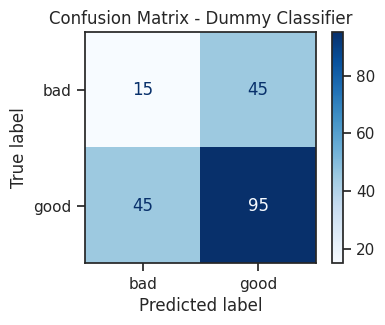

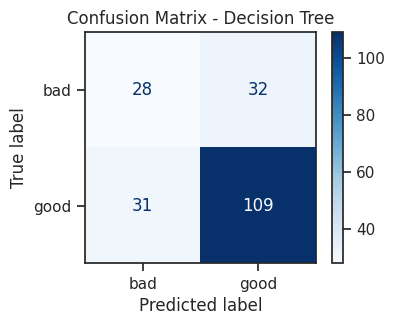

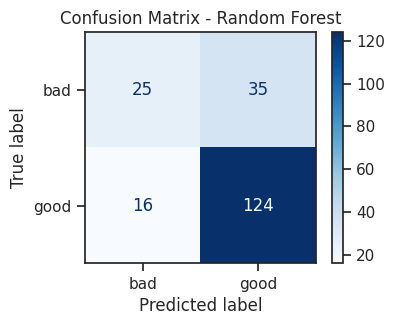

In [ ]:
def create_models():
    dummy_clf = DummyClassifier(strategy='stratified', random_state=42)
    decision_tree = DecisionTreeClassifier(random_state=42)
    random_forest = RandomForestClassifier(random_state=42, n_estimators=100)

    models = {
        'Dummy Classifier': Pipeline([('classifier', dummy_clf)]),
        'Decision Tree': Pipeline([('classifier', decision_tree)]),
        'Random Forest': Pipeline([('classifier', random_forest)])}
    return models

def evaluate_models(models, X_train, y_train, X_test, y_test, n_splits=10):
    results = {}

    for name, model in models.items():
        print(f"\n{'='*20} {name} {'='*20}")

        # Stratified K-Fold Cross Validation
        skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

        fold_accuracies = []
        fold_precisions = []
        fold_recalls = []
        fold_f1s = []

        print(f"Cross-Validation ({n_splits}-fold):")
        for train_idx, val_idx in skf.split(X_train, y_train):
            X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
            y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

            # Addestramento sul fold corrente
            model.fit(X_fold_train, y_fold_train)
            y_fold_pred = model.predict(X_fold_val)

              # Calcolo metriche per il fold corrente
            fold_accuracies.append(accuracy_score(y_fold_val, y_fold_pred))
            fold_precisions.append(precision_score(y_fold_val, y_fold_pred, pos_label='good', zero_division=0))
            fold_recalls.append(recall_score(y_fold_val, y_fold_pred, pos_label='good', zero_division=0))
            fold_f1s.append(f1_score(y_fold_val, y_fold_pred, pos_label='good', zero_division=0))

        # Stampa risultati cross-validation
        print(f"  Accuracy:  {np.mean(fold_accuracies):.4f} (±{np.std(fold_accuracies):.4f})")
        print(f"  Precision: {np.mean(fold_precisions):.4f} (±{np.std(fold_precisions):.4f})")
        print(f"  Recall:    {np.mean(fold_recalls):.4f} (±{np.std(fold_recalls):.4f})")
        print(f"  F1 Score:  {np.mean(fold_f1s):.4f} (±{np.std(fold_f1s):.4f})")

        # Addestramento finale su tutto il training set
        model.fit(X_train, y_train) #X_train e y_train sono già stati preprocessati
        y_pred = model.predict(X_test)

        # Calcolo metriche sul test set
        test_accuracy = accuracy_score(y_test, y_pred)
        test_precision = precision_score(y_test, y_pred, pos_label='good', zero_division=0)
        test_recall = recall_score(y_test, y_pred, pos_label='good', zero_division=0)
        test_f1 = f1_score(y_test, y_pred, pos_label='good', zero_division=0)


        print("\nTest Set Results:")
        print(f"  Accuracy:  {test_accuracy:.4f}")
        print(f"  Precision: {test_precision:.4f}")
        print(f"  Recall:    {test_recall:.4f}")
        print(f"  F1 Score:  {test_f1:.4f}")

        # Visualizzazione matrice di confusione
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['bad', 'good'])
        fig, ax = plt.subplots(figsize=(4, 3))
        disp.plot(ax=ax, cmap='Blues')
        plt.title(f'Confusion Matrix - {name}')
        plt.grid(False)

        # Salvataggio risultati
        results[name] = {
            'model': model,
            'cv_accuracy': np.mean(fold_accuracies),
            'cv_precision': np.mean(fold_precisions),
            'cv_recall': np.mean(fold_recalls),
            'cv_f1': np.mean(fold_f1s),
            'test_accuracy': test_accuracy,
            'test_precision': test_precision,
            'test_recall': test_recall,
            'test_f1': test_f1
        }

    return results


models = create_models()
results = evaluate_models(models, X_train_processed, y_train, X_test_processed, y_test)

best_model_name = max(results.items(), key=lambda x: x[1]['test_accuracy'])[0]
best_model = results[best_model_name]['model']

### Decision Tree Classifier

#### Regularization Hyperparameters

```

In [ ]:
def plot_confusion_matrix(y_true, y_pred, title, class_names):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    fig, ax = plt.subplots(figsize=(4, 3))
    disp.plot(ax=ax, cmap='Blues')
    plt.title(title)
    plt.grid(False)
    plt.show()

In [ ]:
# Install imbalanced-learn if not already installed
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, f1_score, classification_report, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline as ImbPipeline  # Importante!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

def plot_confusion_matrix(y_true, y_pred, title, class_names):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)
    fig, ax = plt.subplots(figsize=(4, 3))
    disp.plot(ax=ax, cmap='Blues')
    plt.title(title)
    plt.grid(False)
    plt.show()

def evaluate_model(model,X_test,y_test, model_name, class_names):
    """ Valuta le performance del modello e ne visualizza i risultati"""

    y_pred = model.predict(X_test)

    # Visualizza la matrice di confusione
    title = f'Confusion Matrix : {model_name}'
    plot_confusion_matrix(y_test, y_pred,title, class_names)

    # Calcola e stampa le metriche
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(classification_report(y_test, y_pred, target_names=class_names))
    print(f"F1-score (weighted) on test set for {model_name}: {f1:.4f}")


    # print("\nMetriche Dettagliate:")
    # print(f"  Precision (bad): {precision_score(y_test, y_pred, pos_label=0):.4f}")
    # print(f"  Recall (bad): {recall_score(y_test, y_pred, pos_label=0):.4f}")
    # print(f"  F1-score (bad): {f1_score(y_test, y_pred, pos_label=0):.4f}")
    # print(f"  Precision (good): {precision_score(y_test, y_pred, pos_label=1):.4f}")
    # print(f"  Recall (good): {recall_score(y_test, y_pred, pos_label=1):.4f}")
    # print(f"  F1-score (good): {f1:.4f}")

    return f1

def get_feature_importances(model, feature_names):

  if hasattr(model, 'named_steps') and 'classifier' in model.named_steps:
    model = model.named_steps['classifier']

  if not hasattr(model, 'feature_importances_'):
    return None # Gestiamo il caso in cui il modello non ha fature_importances_

  importances = model.feature_importances_

  # Creiamo un DataFrame
  feature_importance_df = pd.DataFrame({
      'Feature': list(feature_names),
      'Importance': importances
  })

  return feature_importance_df.sort_values(by='Importance', ascending=False)

def visualize_feature_importances(feature_importance_df, model_name):

  if feature_importance_df is None:
    print(f"Nessuna feature importante è disponibile per il modello {model_name}.")
    return

    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.title(f"Feature Importance for {model_name}")
    plt.tight_layout()
    plt.show()


def run_grid_search(sampler, X_train, y_train, X_test, y_test, cv, class_names,param_grid):
  """ Esegue la grid search con cross-validation """

  # Costruiamo la pipeline con o senza resampling
  pipeline_steps = []
  if sampler is not None:
    pipeline_steps.append(('sampling', sampler))
  pipeline_steps.append(('classifier', DecisionTreeClassifier(random_state=42)))
  pipeline = ImbPipeline(pipeline_steps)

  grid_search = GridSearchCV(
      estimator=pipeline,
      param_grid=param_grid,
      scoring='f1_weighted',
      cv=cv,
      n_jobs=-1,
      verbose=1,
      error_score='raise'
  )

  grid_search.fit(X_train, y_train)

  # Stampa i risultati
  print("Migliori iperparametri:", grid_search.best_params_)
  print("Miglior F1-score (cv):", grid_search.best_score_)

  # Valuta il modello sui dati di test
  best_model = grid_search.best_estimator_
  test_f1 = evaluate_model(best_model, X_test, y_test, str(sampler.__class__.__name__ if sampler else "NoSampling"), class_names)


  return {
      'best_params': grid_search.best_params_,
      'best_f1_weighted_cv': grid_search.best_score_,
      'best_f1_weighted_test': test_f1,
      'best_model': best_model
    }

def visualize_best_tree(model, feature_names, class_names):

    if model and feature_names is not None:
        if hasattr(model, 'named_steps') and 'classifier' in model.named_steps:
            tree = model.named_steps['classifier']
        else:
            tree = model

        plt.figure(figsize=(20, 20))
        plot_tree(tree,
                  feature_names=feature_names,
                  class_names=class_names,
                  filled=True,
                  rounded=True,
                  fontsize=10)
        plt.title(f"Decision Tree")
        plt.tight_layout()
        plt.show()


# base_param_grid = {
#     'classifier__max_depth': [4, 6, 8, 10, 15, None],  # Prova diversi valori di profondità
#     'classifier__min_samples_split': [5, 10, 15, 20],
#     'classifier__min_samples_leaf': [5, 10, 15, 20],
#     'classifier__max_features': ['sqrt', 'log2', None],
#     'classifier__criterion': ['gini', 'entropy'] # Aggiunto il criterio
# }

# Convertiamo le etichette in numeriche
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

param_grid = {
    'classifier__max_depth': [3,4,5, 6,7, 8, 10, 15, None],  # Prova diversi valori di profondità
    'classifier__min_samples_split': [5, 10, 15, 20],
    'classifier__min_samples_leaf': [3, 5, 10, 15, 20],
    'classifier__max_features': [0.6,0.8,0.9,'sqrt', 'log2', None],
    'classifier__criterion': ['gini', 'entropy'] # Aggiunto il criterio
}
# sampling_strategies = [0.7,0.8, 0.9, 1.0]
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
class_names = ['good', 'bad']


# Definisce i metodi di resampling
min_neighbors = min(5, sum(y_train_encoded == 1) - 1) if sum(y_train_encoded == 1) > 1 else 1
min_neighbors_adasyn = min(7, sum(y_train_encoded == 1) - 1) if sum(y_train_encoded == 1) > 1 else 1

samplers = {
      'None': None,
      'RandomOver': RandomOverSampler(random_state=42),
      'SMOTE': SMOTE(random_state=42, k_neighbors=min_neighbors),
      'ADASYN': ADASYN(random_state=42, n_neighbors=min_neighbors_adasyn),
      'RandomUnder': RandomUnderSampler(random_state=42),
      'SMOTETomek': SMOTETomek(random_state=42),
  }

results = {}
for name, sampler in samplers.items():
    print(f"\n{'='*20} GridSearch: {name} {'='*20}")
    results =[name] = run_grid_search(sampler,X_train_processed, y_train_encoded, X_test_processed, y_test_encoded, cv, class_names, param_grid)

# Gestiamo separatamente il caso class_weight
print(f"\n{'='*20} GridSearch: ClassWeight {'='*20}")
param_grid_class_weight = param_grid.copy()
param_grid_class_weight['classifier__class_weight'] = ['balanced']
results['ClassWeight'] = run_grid_search(None, X_train_processed, y_train_encoded, X_test_processed, y_test_encoded, cv, class_names, param_grid_class_weight)


best_method = max(results, key=lambda k: results[k]['best_f1_weighted_test'] if results[k] is not None else -1)
print(f"\nMiglior metodo: {best_method} con F1 score sul test set: {results[best_method]['best_f1_weighted_test']:.4f}")
print("Parametri:")
for param, value in results[best_method]['best_params'].items():
    print(f"  {param}: {value}")

# Visualizziamo il decision tree e le feature più importanti del best-model
best_model = results[best_method]['best_model']
feature_names = X_train_processed.columns if hasattr(X_train_processed, 'columns') else None


if feature_names is not None:
  # Visualizza importanze delle feature
  importances = get_feature_importances(best_model, feature_names)
  visualize_feature_importances(importances, best_method)

  # Visualizza l'albero decisionale
  visualize_best_tree(best_model, feature_names, class_names)



==================== GridSearch: None ====================
Fitting 10 folds for each of 2160 candidates, totalling 21600 fits


### 4.2 Scelta del modello


==================== None ====================
Fitting 5 folds for each of 1920 candidates, totalling 9600 fits
Migliori iperparametri (Standard): {'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__max_features': 0.5, 'classifier__min_samples_leaf': 15, 'classifier__min_samples_split': 5}
Miglior F1-score (media cross-validation): 0.7117737458747986
              precision    recall  f1-score   support

         bad       0.53      0.50      0.51        60
        good       0.79      0.81      0.80       140

    accuracy                           0.71       200
   macro avg       0.66      0.65      0.66       200
weighted avg       0.71      0.71      0.71       200



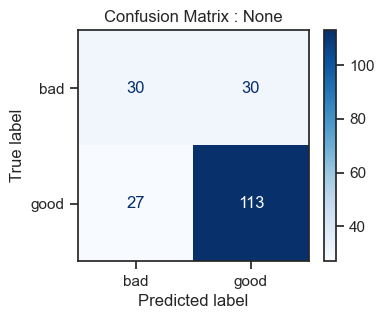


Metriche Dettagliate:
  Precision (bad): 0.5263
  Recall (bad): 0.5000
  F1-score (bad): 0.5128
  Precision (good): 0.7902
  Recall (good): 0.8071
  F1-score (good): 0.7986

==================== RandomOver ====================
Fitting 5 folds for each of 1920 candidates, totalling 9600 fits
Migliori iperparametri (Standard): {'classifier__criterion': 'entropy', 'classifier__max_depth': None, 'classifier__max_features': None, 'classifier__min_samples_leaf': 3, 'classifier__min_samples_split': 5}
Miglior F1-score (media cross-validation): 0.8098339425058338
              precision    recall  f1-score   support

         bad       0.52      0.52      0.52        60
        good       0.79      0.79      0.79       140

    accuracy                           0.71       200
   macro avg       0.65      0.65      0.65       200
weighted avg       0.71      0.71      0.71       200



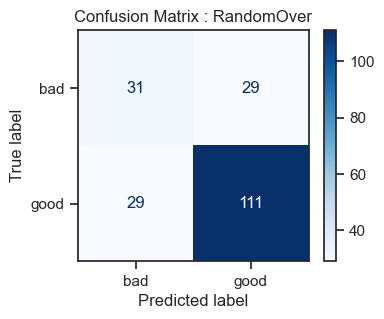


Metriche Dettagliate:
  Precision (bad): 0.5167
  Recall (bad): 0.5167
  F1-score (bad): 0.5167
  Precision (good): 0.7929
  Recall (good): 0.7929
  F1-score (good): 0.7929

==================== SMOTE ====================
Fitting 5 folds for each of 1920 candidates, totalling 9600 fits
Migliori iperparametri (Standard): {'classifier__criterion': 'gini', 'classifier__max_depth': 7, 'classifier__max_features': 0.7, 'classifier__min_samples_leaf': 5, 'classifier__min_samples_split': 20}
Miglior F1-score (media cross-validation): 0.783641977019128
              precision    recall  f1-score   support

         bad       0.54      0.60      0.57        60
        good       0.82      0.78      0.80       140

    accuracy                           0.72       200
   macro avg       0.68      0.69      0.68       200
weighted avg       0.73      0.72      0.73       200



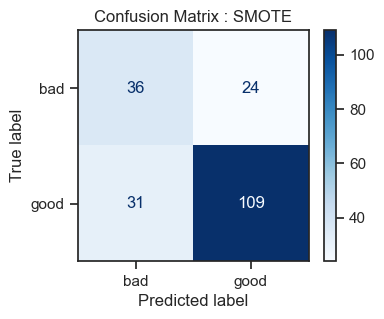


Metriche Dettagliate:
  Precision (bad): 0.5373
  Recall (bad): 0.6000
  F1-score (bad): 0.5669
  Precision (good): 0.8195
  Recall (good): 0.7786
  F1-score (good): 0.7985

==================== ADASYN ====================
Fitting 5 folds for each of 1920 candidates, totalling 9600 fits
Error during execution with ADASYN: 
All the 9600 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9600 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\nico\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\nico\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return 

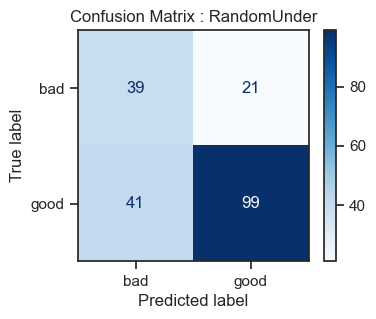


Metriche Dettagliate:
  Precision (bad): 0.4875
  Recall (bad): 0.6500
  F1-score (bad): 0.5571
  Precision (good): 0.8250
  Recall (good): 0.7071
  F1-score (good): 0.7615

==================== SMOTETomek ====================
Fitting 5 folds for each of 1920 candidates, totalling 9600 fits
Migliori iperparametri (Standard): {'classifier__criterion': 'gini', 'classifier__max_depth': 6, 'classifier__max_features': 0.8, 'classifier__min_samples_leaf': 10, 'classifier__min_samples_split': 5}
Miglior F1-score (media cross-validation): 0.7840719202161737
              precision    recall  f1-score   support

         bad       0.51      0.75      0.60        60
        good       0.86      0.69      0.76       140

    accuracy                           0.70       200
   macro avg       0.69      0.72      0.68       200
weighted avg       0.76      0.70      0.72       200



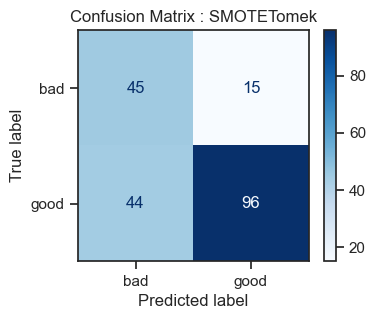


Metriche Dettagliate:
  Precision (bad): 0.5056
  Recall (bad): 0.7500
  F1-score (bad): 0.6040
  Precision (good): 0.8649
  Recall (good): 0.6857
  F1-score (good): 0.7649

==================== ClassWeight ====================
Fitting 5 folds for each of 1920 candidates, totalling 9600 fits
Migliori iperparametri (Standard): {'classifier__criterion': 'gini', 'classifier__max_depth': 15, 'classifier__max_features': 0.8, 'classifier__min_samples_leaf': 5, 'classifier__min_samples_split': 15}
Miglior F1-score (media cross-validation): 0.6977491731762526
              precision    recall  f1-score   support

         bad       0.38      0.57      0.46        60
        good       0.77      0.61      0.68       140

    accuracy                           0.59       200
   macro avg       0.57      0.59      0.57       200
weighted avg       0.65      0.59      0.61       200



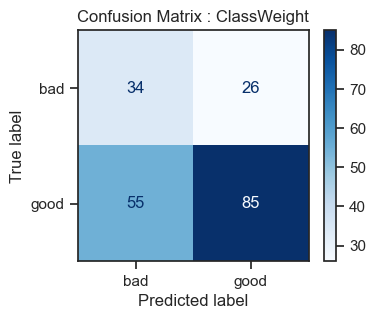


Metriche Dettagliate:
  Precision (bad): 0.3820
  Recall (bad): 0.5667
  F1-score (bad): 0.4564
  Precision (good): 0.7658
  Recall (good): 0.6071
  F1-score (good): 0.6773


In [ ]:
# # Install imbalanced-learn if not already installed
# from sklearn.model_selection import GridSearchCV, StratifiedKFold
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import make_scorer, f1_score, classification_report, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
# from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.combine import SMOTETomek
# from imblearn.pipeline import Pipeline as ImbPipeline  # Importante!
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import LabelEncoder

# # Convertiamo le etichette in numeriche
# label_encoder = LabelEncoder()
# y_train_encoded = label_encoder.fit_transform(y_train)
# y_test_encoded = label_encoder.transform(y_test)

# # Strategia di bilanciamento che agisce sugli iperparametri

# samplers = {
#     'None': None,  # Nessun bilanciamento
#     'RandomOver': RandomOverSampler(random_state=42),
#     'SMOTE': SMOTE(random_state=42),
#     'ADASYN': ADASYN(random_state=42),
#     'RandomUnder': RandomUnderSampler(random_state=42),
#     'SMOTETomek': SMOTETomek(random_state=42),
#     'ClassWeight': 'balanced'
# }

# sampling_stategies = [0.7, 0.9, 1.0]

# # Definisci la griglia di iperparametri da esplorare
# param_grid = {
#     'max_depth': [4, 6, 8, 10, 15,  None],  # Prova diversi valori di profondità
#     'min_samples_split': [5, 10, 15, 20],
#     'min_samples_leaf': [5, 10, 15, 20],
#     'max_features': ['sqrt', 'log2', None],
#     'classifier__criterion': ['gini', 'entropy'] # Aggiunto il criterio
# }

# # Usa StratifiedKFold per gestire lo sbilanciamento
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


# def evaluate_model(model,X_test,y_test, sampler_name, class_names):
#     y_pred = model.predict(X_test)
#     print(classification_report(y_test, y_pred, target_names=class_names))

#     title = f'Confusion Matrix : {sampler_name}'
#     plot_confusion_matrix(y_test, y_pred,title, class_names)

#     print("\nMetriche Dettagliate:")
#     print(f"  Precision (bad): {precision_score(y_test, y_pred, pos_label=0):.4f}")
#     print(f"  Recall (bad): {recall_score(y_test, y_pred, pos_label=0):.4f}")
#     print(f"  F1-score (bad): {f1_score(y_test, y_pred, pos_label=0):.4f}")
#     print(f"  Precision (good): {precision_score(y_test, y_pred, pos_label=1):.4f}")
#     print(f"  Recall (good): {recall_score(y_test, y_pred, pos_label=1):.4f}")
#     print(f"  F1-score (good): {f1_score(y_test, y_pred, pos_label=1):.4f}")

# # --- loop che itera tutte le strategie di bilanciamento ---
# for sampler_name, sampler in samplers.items():
#     print(f"\n{'='*20} {sampler_name} {'='*20}")

#     try:
#         # Creazione la pipeline
#         if sampler_name == 'ClassWeight':
#             pipeline = Pipeline([
#                 ('classifier', DecisionTreeClassifier(random_state=42, class_weight="balanced"))
#             ])
#             # Nessun resampling
#             X_resampled, y_resampled = X_train_processed, y_train_encoded
#         else:
#             if sampler is not None:
#                 try:
#                     X_resampled, y_resampled = sampler.fit_resample(X_train_processed, y_train_encoded)
#                     pipeline = ImbPipeline([
#                         ('sampling', sampler),
#                         ('classifier', DecisionTreeClassifier(random_state=42))
#                     ])
#                 except ValueError as e:
#                     print(f"Error with {sampler_name} sampler: {e}")
#                     print(f"Skipping {sampler_name} sampler...")
#                     continue
#             else:
#                 pipeline = Pipeline([
#                     ('classifier', DecisionTreeClassifier(random_state=42))
#                 ])
#                 X_resampled, y_resampled = X_train_processed, y_train_encoded

#         # Define f1_scorer if not already defined
#         f1_scorer = make_scorer(f1_score, average='weighted')

#         grid_search = GridSearchCV(
#             pipeline,
#             param_grid,
#             scoring=f1_scorer,
#             cv=cv,
#             n_jobs=-1,
#             verbose=3
#         )

#         grid_search.fit(X_resampled, y_resampled)
#     except Exception as e:
#         print(f"Error during execution with {sampler_name}: {e}")
#         continue

#     # Risultati
#     print("Migliori iperparametri (Standard):", grid_search.best_params_)
#     print("Miglior F1-score (media cross-validation):", grid_search.best_score_)


#     best_model = grid_search.best_estimator_
#     evaluate_model(best_model, X_test_processed, y_test_encoded, sampler_name, label_encoder.classes_)

### 4.3 Performance Misurate

#### 4.3.1 Misura dell'accuratezza Cross-Validation

#### 4.3.3 Precision and Recall

#### 4.3.2 Confusion Matrix



### 4.3.3 Precision/Recall Trade-off

#### 4.3.4 The ROC Curve

-----------------

In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from IPython.display import display

ordinal_features = ["Account_balance",
                    "Credit_history",
                    "Saving_accounts",
                    "Employment_length",
                    "Installment_rate",
                    "Residence_duration",
                    "Existing_credits_count",
                    "Dependents_count" ]

# Lista delle features nominali
nominal_features = [
    "Purpose",
    "Sex_and_Marital_status",
    "Guarantor",
    "Most_valuable_asset", #può essere interpratata anche come ordinale (da beni meno soldi a più solidi)
    "Concurrent_credits",
    "Type_apartment",
    "Job",
    "Telephone",
    "Foreign_worker" ]

# Print unique values in each ordinal column before encoding
print("Unique values before encoding:")
for col in ordinal_features:
    print(f"\nColumn: {col}")
    print(X_train[col].unique())


# Applico Ordinal Encoding per le feature ordinali
ordinal_encoder = OrdinalEncoder(categories=[ ['no account', 'low', 'medium', 'high'],
                                             ['no credits', 'all credits paid', 'existing credits paid', 'delay in past', 'critical account'],
                                             ['no savings account', 'little', 'moderate', 'quite rich', 'rich'],
                                             ['unemployed', '< 1 year', '1 - 4 years', '4 - 7 years', '>= 7 years'],
                                             [1, 2, 3, 4],
                                             [1, 2, 3, 4],
                                             [1, 2, 3, 4],
                                             [1, 2],
                                            ],
                                handle_unknown='use_encoded_value',
                                unknown_value= -1
                                 )
# Print X_train before encoding
print("\nX_train before encoding:")
display(X_train.head())
X_train[ordinal_features] = ordinal_encoder.fit_transform(X_train[ordinal_features])
X_test[ordinal_features] = ordinal_encoder.transform(X_test[ordinal_features])

#Print X_train and X_test after encoding
print("\nX_train after encoding:")
display(X_train.head(10))
print("\nX_test after encoding:")
display(X_test.head(10))

Unique values before encoding:

Column: Account_balance
['no account' 'medium' 'low' 'high']

Column: Credit_history
['critical account' 'delay in past' 'existing credits paid'
 'all credits paid' 'no credits']

Column: Saving_accounts
['little' 'moderate' 'no savings account' 'quite rich' 'rich']

Column: Employment_length
['4 - 7 years' '>= 7 years' '1 - 4 years' '< 1 year' 'unemployed']

Column: Installment_rate
[4 1 2 3]

Column: Residence_duration
[4 2 1 3]

Column: Existing_credits_count
[1 2 4 3]

Column: Dependents_count
[1 2]

X_train before encoding:


,Account_balance,Duration,Credit_history,Purpose,Credit_amount,Saving_accounts,Employment_length,Installment_rate,Sex_and_Marital_status,Guarantor,Residence_duration,Most_valuable_asset,Age,Concurrent_credits,Type_apartment,Existing_credits_count,Job,Dependents_count,Foreign_worker
675,no account,30,critical account,domestic appliances,4530,little,4 - 7 years,4,female divorced/separated/married,none,4,car,26,stores,own,1,management/self-employed/highly qualified empl...,1,yes
703,medium,30,delay in past,others,2503,moderate,>= 7 years,4,male single,none,2,life insurance,41,bank,for free,2,skilled employee/official,1,yes
12,medium,12,existing credits paid,domestic appliances,1567,little,1 - 4 years,1,female divorced/separated/married,none,1,car,22,stores,for free,1,skilled employee/official,1,yes
845,medium,21,existing credits paid,radio/TV,3976,no savings account,4 - 7 years,2,male single,none,3,car,35,stores,for free,1,skilled employee/official,1,yes
795,no account,9,existing credits paid,radio/TV,2301,moderate,< 1 year,2,female divorced/separated/married,none,4,life insurance,22,stores,own,1,skilled employee/official,1,yes



X_train after encoding:


,Account_balance,Duration,Credit_history,Purpose,Credit_amount,Saving_accounts,Employment_length,Installment_rate,Sex_and_Marital_status,Guarantor,Residence_duration,Most_valuable_asset,Age,Concurrent_credits,Type_apartment,Existing_credits_count,Job,Dependents_count,Foreign_worker
675,0.0,30,4.0,domestic appliances,4530,1.0,3.0,3.0,female divorced/separated/married,none,3.0,car,26,stores,own,0.0,management/self-employed/highly qualified empl...,0.0,yes
703,2.0,30,3.0,others,2503,2.0,4.0,3.0,male single,none,1.0,life insurance,41,bank,for free,1.0,skilled employee/official,0.0,yes
12,2.0,12,2.0,domestic appliances,1567,1.0,2.0,0.0,female divorced/separated/married,none,0.0,car,22,stores,for free,0.0,skilled employee/official,0.0,yes
845,2.0,21,2.0,radio/TV,3976,0.0,3.0,1.0,male single,none,2.0,car,35,stores,for free,0.0,skilled employee/official,0.0,yes
795,0.0,9,2.0,radio/TV,2301,2.0,1.0,1.0,female divorced/separated/married,none,3.0,life insurance,22,stores,own,0.0,skilled employee/official,0.0,yes
566,1.0,12,2.0,car,1372,1.0,3.0,1.0,male divorced/separated,none,2.0,car,36,stores,for free,0.0,skilled employee/official,0.0,yes
843,0.0,24,1.0,others,1559,1.0,3.0,3.0,male single,none,3.0,car,50,none,for free,0.0,skilled employee/official,0.0,yes
750,1.0,6,2.0,radio/TV,428,1.0,4.0,1.0,female divorced/separated/married,none,0.0,life insurance,49,none,for free,0.0,skilled employee/official,0.0,yes
841,0.0,21,3.0,furniture/equipment,2993,1.0,2.0,2.0,male single,none,1.0,real estate,28,bank,for free,1.0,unskilled - resident,0.0,yes
380,1.0,20,2.0,radio/TV,2212,0.0,3.0,3.0,male single,none,3.0,car,39,stores,for free,0.0,skilled employee/official,0.0,yes



X_test after encoding:


,Account_balance,Duration,Credit_history,Purpose,Credit_amount,Saving_accounts,Employment_length,Installment_rate,Sex_and_Marital_status,Guarantor,Residence_duration,Most_valuable_asset,Age,Concurrent_credits,Type_apartment,Existing_credits_count,Job,Dependents_count,Foreign_worker
977,2.0,18,3.0,others,2427,0.0,4.0,3.0,male single,none,1.0,life insurance,42,stores,for free,1.0,skilled employee/official,0.0,yes
735,2.0,36,1.0,repairs,3990,0.0,1.0,2.0,female divorced/separated/married,none,1.0,no property,29,none,for free,0.0,unemployed/unskilled - non-resident,0.0,yes
615,2.0,48,0.0,others,12204,0.0,2.0,1.0,male single,none,1.0,car,48,none,for free,0.0,management/self-employed/highly qualified empl...,0.0,yes
413,0.0,10,2.0,car,1597,3.0,2.0,2.0,male single,none,1.0,no property,40,stores,own,0.0,unskilled - resident,1.0,no
563,2.0,36,2.0,car,12389,0.0,2.0,0.0,male single,none,3.0,no property,37,stores,rent,0.0,skilled employee/official,0.0,yes
27,3.0,12,1.0,domestic appliances,409,4.0,2.0,2.0,female divorced/separated/married,none,2.0,real estate,42,stores,own,1.0,skilled employee/official,0.0,yes
514,0.0,24,2.0,car,2255,0.0,1.0,3.0,male single,none,0.0,life insurance,54,stores,for free,0.0,skilled employee/official,0.0,yes
624,1.0,18,2.0,domestic appliances,2600,1.0,2.0,3.0,male single,none,3.0,no property,65,stores,rent,1.0,skilled employee/official,0.0,yes
475,1.0,18,0.0,radio/TV,3114,1.0,1.0,0.0,female divorced/separated/married,none,3.0,life insurance,26,stores,own,0.0,skilled employee/official,0.0,yes
991,0.0,15,1.0,domestic appliances,1569,2.0,4.0,3.0,male single,none,3.0,car,34,none,for free,0.0,unskilled - resident,1.0,yes


In [ ]:
# One-Hot Encoding per le features nominali
X_train = pd.get_dummies(X_train, columns=nominal_features, drop_first=True)
X_test = pd.get_dummies(X_test, columns=nominal_features, drop_first=True)

# Visualizza i primi 5 record per verificare la conversione
display(X_train.head())
display(X_test.head())

KeyError: "['Telephone'] not in index"

### 3.3 Standardizzazione

Bisogna prima convertire in valori numerici i dati all'interno del nostro dataset per effettuare un processo di standardizzazione

Ci sono diverse tecniche che si possono utilizzare (la più scontata è utilizzare il dataset con la conversione già effettuata, ma per motivi accademici realizzerei una nostra conversione):

**1. One-Hot Encoding:**

*   **Idea:** Crea una nuova colonna binaria per ogni possibile valore di una variabile categorica.
*   **Vantaggi:** Semplice da implementare, non introduce alcun ordinamento implicito nelle categorie.
*   **Svantaggi:** Aumenta la dimensionalità del dataset, può portare a problemi di multicollinearità.
*   **Implementazione con `pd.get_dummies`:**

    ```python
    import pandas as pd

    # [Caricamento dati - come mostrato negli esempi precedenti]
    col_names = ['Status of existing checking account',
        'Duration in month',
        'Credit history',
        'Purpose',
        'Credit amount',
        'Savings account/bonds',
        'Present employment since',
        'Installment rate in percentage of disposable income',
        'Personal status and sex',
        'Other debtors / guarantors',
        'Present residence since',
        'Property',
        'Age in years',
        'Other installment plans',
        'Housing',
        'Number of existing credits at this bank',
        'Job',
        'Number of people being liable to provide maintenance for',
        'Telephone',
        'foreign worker',
        'target']

    data = pd.read_csv('german.data', sep=' ', header=None, names=col_names)
    # Converti 'target' in numerico (se necessario)
    data['target'] = pd.to_numeric(data['target'])

    # Identifica le colonne categoriche (tipo object)
    categorical_cols = data.select_dtypes(include=['object']).columns

    # Applica one-hot encoding
    data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

    print(data_encoded.head())
    print(data_encoded.shape) #Verifica la dimensionalità
    ```

    *   `categorical_cols = data.select_dtypes(include=['object']).columns` seleziona le colonne categoriche.
    *   `data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)` esegue l'one-hot encoding. `drop_first=True` è importante per evitare la multicollinearità (rimuove la prima categoria di ogni variabile).

**2. Label Encoding:**

*   **Idea:** Assegna un numero intero univoco a ciascuna categoria di una variabile.
*   **Vantaggi:** Non aumenta la dimensionalità, semplice da implementare.
*   **Svantaggi:** Introduce un ordinamento implicito nelle categorie (anche se non esiste), può influenzare negativamente alcuni modelli (es. regressione lineare).
*   **Implementazione con `LabelEncoder`:**

    ```python
    from sklearn.preprocessing import LabelEncoder
    import pandas as pd
    # [Caricamento dati - come mostrato negli esempi precedenti]
    col_names = ['Status of existing checking account',
        'Duration in month',
        'Credit history',
        'Purpose',
        'Credit amount',
        'Savings account/bonds',
        'Present employment since',
        'Installment rate in percentage of disposable income',
        'Personal status and sex',
        'Other debtors / guarantors',
        'Present residence since',
        'Property',
        'Age in years',
        'Other installment plans',
        'Housing',
        'Number of existing credits at this bank',
        'Job',
        'Number of people being liable to provide maintenance for',
        'Telephone',
        'foreign worker',
        'target']

    data = pd.read_csv('german.data', sep=' ', header=None, names=col_names)
    # Converti 'target' in numerico (se necessario)
    data['target'] = pd.to_numeric(data['target'])

    # Identifica le colonne categoriche (tipo object)
    categorical_cols = data.select_dtypes(include=['object']).columns

    # Applica label encoding
    label_encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le #Salva gli encoders per l'inverso mapping se necessario

    print(data.head())
    print(data.shape)
    ```

    *   `LabelEncoder` converte ogni categoria in un intero.
    *   Salvare gli `label_encoders` permette di riconvertire i valori numerici alle categorie originali se necessario.

**3. Ordinal Encoding:**

*   **Idea:** Simile a Label Encoding, ma assegna i numeri interi in base a un ordinamento significativo delle categorie.
*   **Vantaggi:** Utile quando le categorie hanno un ordine intrinseco (es. "basso", "medio", "alto").
*   **Svantaggi:** Richiede una conoscenza specifica del dominio per definire l'ordinamento, introduce un ordinamento anche quando non è appropriato.
*   **Implementazione manuale:**

    ```python
    import pandas as pd
    # [Caricamento dati - come mostrato negli esempi precedenti]
    col_names = ['Status of existing checking account',
        'Duration in month',
        'Credit history',
        'Purpose',
        'Credit amount',
        'Savings account/bonds',
        'Present employment since',
        'Installment rate in percentage of disposable income',
        'Personal status and sex',
        'Other debtors / guarantors',
        'Present residence since',
        'Property',
        'Age in years',
        'Other installment plans',
        'Housing',
        'Number of existing credits at this bank',
        'Job',
        'Number of people being liable to provide maintenance for',
        'Telephone',
        'foreign worker',
        'target']

    data = pd.read_csv('german.data', sep=' ', header=None, names=col_names)
    # Converti 'target' in numerico (se necessario)
    data['target'] = pd.to_numeric(data['target'])

    # Definisci l'ordinamento per le colonne specifiche (ad esempio, 'Status of existing checking account')
    checking_account_mapping = {'A14': 0, 'A11': 1, 'A12': 2, 'A13': 3}  #Esempio di ordinamento
    employment_mapping = {'A71': 0, 'A72': 1, 'A73': 2, 'A74': 3, 'A75':4} #Esempio di ordinamento

    # Applica la mappatura
    data['Status of existing checking account'] = data['Status of existing checking account'].map(checking_account_mapping)
    data['Present employment since'] = data['Present employment since'].map(employment_mapping)

    print(data.head())
    print(data.shape)
    ```
    *   Definisci un dizionario di mappatura per ogni colonna che vuoi codificare ordinalmente.
    *   Usa il metodo `.map()` per applicare la mappatura al DataFrame.

**4. Target Encoding (Mean Encoding):**

*   **Idea:** Sostituisce ogni categoria con la media della variabile target per quella categoria.
*   **Vantaggi:** Può catturare informazioni predittive utili dalle categorie.
*   **Svantaggi:** Rischio di overfitting (soprattutto con poche osservazioni per categoria), richiede una gestione attenta per evitare data leakage.
*   **Implementazione:**

    ```python
    import pandas as pd
    # [Caricamento dati - come mostrato negli esempi precedenti]
    col_names = ['Status of existing checking account',
        'Duration in month',
        'Credit history',
        'Purpose',
        'Credit amount',
        'Savings account/bonds',
        'Present employment since',
        'Installment rate in percentage of disposable income',
        'Personal status and sex',
        'Other debtors / guarantors',
        'Present residence since',
        'Property',
        'Age in years',
        'Other installment plans',
        'Housing',
        'Number of existing credits at this bank',
        'Job',
        'Number of people being liable to provide maintenance for',
        'Telephone',
        'foreign worker',
        'target']

    data = pd.read_csv('german.data', sep=' ', header=None, names=col_names)
    # Converti 'target' in numerico (se necessario)
    data['target'] = pd.to_numeric(data['target'])

    # Identifica le colonne categoriche
    categorical_cols = data.select_dtypes(include=['object']).columns

    # Applica target encoding
    for col in categorical_cols:
        means = data.groupby(col)['target'].mean()
        data[col] = data[col].map(means)

    print(data.head())
    print(data.shape)
    ```

    *   Calcola la media della variabile target per ogni categoria.
    *   Sostituisci le categorie con le rispettive medie.
    *   **Attenzione:** Questo metodo può portare ad overfitting. Implementa tecniche di regolarizzazione (es. smoothing, adding noise, K-fold cross-validation)

**Standardizzazione e Normalizzazione:**

Dopo aver convertito tutte le variabili in numeriche, puoi applicare la standardizzazione o la normalizzazione:

*   **Standardizzazione (StandardScaler):** Scala le variabili in modo che abbiano media 0 e deviazione standard 1. Utile quando le variabili hanno scale diverse e vuoi che tutti contribuiscano allo stesso modo al modello.
*   **Normalizzazione (MinMaxScaler):** Scala le variabili in un intervallo specifico (es. 0-1). Utile quando vuoi limitare i valori delle variabili in un intervallo specifico.

```python
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Standardizzazione
scaler = StandardScaler()
numerical_cols = data.select_dtypes(include=['number']).columns #Prendi tutte le colonne numeriche

data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

#Normalizzazione
scaler = MinMaxScaler()
numerical_cols = data.select_dtypes(include=['number']).columns

data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

print(data.head())
```

**Feature Engineering:**

Dopo aver convertito e scalato le variabili, puoi creare nuove feature combinando o trasformando le feature esistenti. Esempi:

*   **Combinazione di Feature:** Crea una nuova feature combinando due o più feature esistenti (es. creando un indice di rischio di credito).
*   **Feature Polynomiali:** Crea nuove feature elevando al quadrato o al cubo le feature esistenti per catturare relazioni non lineari.
*   **Feature di Interazione:** Crea nuove feature moltiplicando due o più feature esistenti per catturare l'interazione tra di esse.

**Quale Metodo Scegliere?**

*   **One-Hot Encoding:** È la scelta più sicura se non hai un motivo specifico per preferire un altro metodo. Evita di introdurre ordinamenti artificiali e funziona bene con la maggior parte dei modelli.
*   **Label Encoding:** Usalo solo se sei sicuro che l'ordinamento implicito non influenzerà negativamente il modello.
*   **Ordinal Encoding:** Usalo solo se le categorie hanno un ordinamento significativo e sei in grado di definirlo correttamente.
*   **Target Encoding:** Usalo con cautela e implementa tecniche di regolarizzazione per evitare l'overfitting.

**Considerazioni Importanti:**

*   **Data Leakage:** Evita di usare informazioni dalla variabile target durante la conversione delle variabili categoriche (soprattutto con Target Encoding) per evitare il data leakage e l'overfitting.
*   **Multicollinearità:** Se usi One-Hot Encoding, fai attenzione alla multicollinearità. Rimuovi la prima categoria di ogni variabile (usando `drop_first=True` in `pd.get_dummies`) o usa tecniche di regolarizzazione (es. Ridge Regression).
*   **Interpretazione:** Sii consapevole di come la conversione delle variabili categoriche influenzerà l'interpretazione del tuo modello.

Segui questi passaggi e dovresti essere in grado di convertire con successo le variabili categoriche in numeriche, standardizzare i dati e creare nuove feature per il tuo problema di rischio di credito.





### 3.4 Feature Engineering

**Motivi per cui il Feature Engineering è Utile in `german.data`:**

1.  **Variabili Categoriche:** Il dataset contiene un numero significativo di variabili categoriche. Il feature engineering è fondamentale per trasformare queste variabili in una forma che gli algoritmi di machine learning possano gestire efficacemente.
2.  **Non Linearità e Interazioni:** Le relazioni tra le variabili e la variabile target (rischio di credito) potrebbero non essere lineari. Il feature engineering può aiutare a catturare queste non linearità e le interazioni tra le variabili.
3.  **Conoscenza del Dominio:** Il dataset riguarda il rischio di credito, un'area in cui la conoscenza del dominio può essere utilizzata per creare nuove feature che catturino aspetti specifici del rischio.
4.  **Migliorare la Performance del Modello:** L'obiettivo principale del feature engineering è migliorare la performance del modello. Creando nuove feature più informative, puoi aumentare la capacità del modello di distinguere tra buoni e cattivi rischi di credito.

**Tecniche di Feature Engineering Appropriati per `german.data`:**

1.  **Encoding delle Variabili Categoriche:**

    *   **One-Hot Encoding:** Trasforma ogni valore di una variabile categorica in una nuova colonna binaria. Ad esempio, la variabile "Purpose" (scopo del prestito) potrebbe essere trasformata in colonne come "Purpose\_Car", "Purpose\_Furniture", ecc. (l'ho già menzionato, ma è fondamentale).
    *   **Label Encoding:** Assegna un numero intero univoco a ciascun valore di una variabile categorica. Questo è appropriato per variabili categoriche ordinali (cioè, con un ordine intrinseco).
    *   **Target Encoding:** Sostituisce ogni valore di una variabile categorica con la media della variabile target per quel valore. Questo può essere molto efficace, ma è importante fare attenzione all'overfitting (usare tecniche come la cross-validation o l'aggiunta di rumore).

2.  **Creazione di Feature Interattive:**

    *   **Combinazione di Variabili Categoriche:** Crea nuove variabili combinando i valori di due o più variabili categoriche. Ad esempio, potresti combinare "Status of existing checking account" e "Credit history" per creare una nuova variabile che catturi la combinazione di questi due fattori.
    *   **Interazioni tra Variabili Numeriche e Categoriche:** Crea nuove variabili moltiplicando o dividendo variabili numeriche per variabili categoriche codificate (ad esempio, moltiplicando "Credit amount" per "Purpose\_Car").

3.  **Trasformazioni delle Variabili Numeriche:**

    *   **Trasformazioni Logaritmiche:** Applica la trasformazione logaritmica a variabili numeriche con distribuzioni asimmetriche (ad esempio, "Credit amount"). Questo può aiutare a ridurre l'influenza degli outlier e a rendere i dati più gaussiani.
    *   **Trasformazioni di Potenza:** Usa trasformazioni di potenza (es. radice quadrata, cubo) per modificare la forma della distribuzione delle variabili numeriche.
    *   **Bining/Discretizzazione:** Trasforma variabili numeriche continue in variabili categoriche creando intervalli (bin). Ad esempio, potresti creare intervalli di età (es. "Giovane", "Adulto", "Anziano").

4.  **Feature Engineering Basato sulla Conoscenza del Dominio:**

    *   **Ratio Debito/Reddito:** Crea una nuova variabile che rappresenti il rapporto tra l'importo del prestito ("Credit amount") e il reddito del richiedente (che potrebbe essere stimato in base a "Present employment since" e altre variabili).
    *   **Durata del Prestito/Età:** Crea una nuova variabile che rappresenti il rapporto tra la durata del prestito ("Duration in month") e l'età del richiedente ("Age in years").
    *   **Variabili di Rischio Combinate:** Crea variabili che combinino diverse informazioni sul rischio del richiedente, come lo stato del conto corrente, la storia creditizia e lo scopo del prestito.

**Considerazioni Importanti:**

*   **Cross-Validation:** Usa la cross-validation per valutare l'impatto del feature engineering sulla performance del modello e per evitare l'overfitting.
*   **Interpretabilità:** Cerca di creare feature che siano interpretabili e che abbiano un significato logico nel contesto del rischio di credito.
*   **Sperimentazione:** Il feature engineering è un processo iterativo. Sperimenta con diverse tecniche e combinazioni di feature per vedere cosa funziona meglio.

**Esempio di Codice (Encoding e Interazione):**

```python
import pandas as pd

# [Caricamento dati - OMETTO PER BREVITÀ]

# One-hot encoding di 'Purpose'
data = pd.get_dummies(data, columns=['Purpose'], prefix='Purpose')

# Interazione tra 'Credit amount' e 'Purpose_Car'
data['Credit_Amount_x_Purpose_Car'] = data['Credit amount'] * data['Purpose_Car_A40'] #A40 è l'etichetta per la macchina nuova

print(data.head())
```

In conclusione, il feature engineering è un passo essenziale per ottenere buone performance con il dataset `german.data`. Sperimenta con diverse tecniche, usa la cross-validation per valutare i risultati e cerca di creare feature che abbiano un significato nel contesto del rischio di credito.

Inserisco un analisi più approfondita qui di seguito in modo da poter effettuare una scelta più mirata:

Ecco alcune tecniche di feature engineering pertinenti al dataset "German Credit", valutando i pro e i contro di ciascuna:

**Tecniche di Feature Engineering:**

1.  **Combinazioni di Feature (Feature Interactions):**

    *   **Idea:** Crea nuove feature moltiplicando o combinando variabili esistenti. Questo può catturare interazioni non lineari tra le variabili.
    *   **Esempi Specifici per German Credit:**
        *   `Duration_x_Amount`: Moltiplica "Duration in month" (durata del prestito) per "Credit amount" (importo del prestito). Questo crea una feature che rappresenta l'esposizione totale al rischio del prestito. Un prestito di lunga durata con un importo elevato potrebbe essere più rischioso di un prestito breve con un importo basso.
        *   `Rate_x_Income`: Moltiplica "Installment rate in percentage of disposable income" (tasso di rata) per una stima del "disposable income" (che potresti creare a partire da "Age" e "Job"). Questo cattura la pressione finanziaria sul debitore. Un alto tasso di rata combinato con un basso reddito disponibile potrebbe indicare un rischio elevato.
        *   `Age_x_Credits`: Moltiplica "Age in years" (età) per "Number of existing credits at this bank" (numero di crediti esistenti). Potrebbe catturare l'esperienza creditizia del debitore. Un debitore più anziano con molti crediti potrebbe essere più affidabile (o più a rischio di sovraindebitamento).
    *   **Vantaggi:** Può catturare interazioni complesse, migliorare l'accuratezza del modello.
    *   **Svantaggi:** Aumenta la dimensionalità, può portare a overfitting se non gestita correttamente.
    *   **Motivazione:** Molti aspetti del rischio di credito non sono lineari. Combinare le feature può aiutare a catturare queste non linearità.

2.  **Feature Polynomiali:**

    *   **Idea:** Crea nuove feature elevando al quadrato, al cubo, o ad altre potenze le variabili esistenti.
    *   **Esempi Specifici per German Credit:**
        *   `Duration^2`, `Amount^2`, `Age^2`: Aggiungere il quadrato di "Duration", "Amount" e "Age". Potrebbe essere che la relazione tra queste variabili e il rischio di credito non sia lineare. Ad esempio, il rischio potrebbe aumentare più rapidamente con l'aumentare della durata del prestito.
    *   **Vantaggi:** Cattura relazioni non lineari.
    *   **Svantaggi:** Aumenta la dimensionalità, può portare a overfitting.
    *   **Motivazione:** Alcune relazioni potrebbero essere non lineari. Ad esempio, l'impatto dell'età sul rischio di credito potrebbe non essere lineare: i giovani potrebbero essere più rischiosi, gli adulti più stabili e gli anziani di nuovo più rischiosi.

3.  **Binning (Discretizzazione):**

    *   **Idea:** Divide una variabile continua in intervalli discreti (bin).
    *   **Esempi Specifici per German Credit:**
        *   Binning di "Age": Crea categorie di età (es. "giovane", "adulto", "anziano"). Potrebbe essere più informativo che usare l'età esatta.
        *   Binning di "Credit Amount": Crea categorie di importo del prestito (es. "piccolo", "medio", "grande").
    *   **Vantaggi:** Semplifica le relazioni non lineari, gestisce gli outlier, può migliorare la robustezza del modello.
    *   **Svantaggi:** Perde informazioni, richiede una scelta attenta dei bin.
    *   **Motivazione:** Potrebbe essere che l'impatto di una variabile continua come l'età o l'importo del prestito non sia lineare, ma piuttosto dipenda da quale categoria appartiene il valore.

4.  **Creazione di Indici (Feature Aggregation):**

    *   **Idea:** Combina più variabili in un singolo indice che catturi un concetto più ampio.
    *   **Esempi Specifici per German Credit:**
        *   "Debt-to-Income Ratio" (se hai una stima del reddito).
        *   "Credit History Score": Combina informazioni da "Credit history", "Number of existing credits at this bank", "Duration in month" per creare un punteggio che rappresenti la solidità della storia creditizia del debitore.
    *   **Vantaggi:** Riduce la dimensionalità, cattura concetti complessi, può migliorare l'interpretazione.
    *   **Svantaggi:** Richiede una conoscenza specifica del dominio, la scelta dei pesi può essere arbitraria.
    *   **Motivazione:** Alcuni concetti chiave per la valutazione del rischio di credito (come la "capacità di rimborso" o la "stabilità finanziaria") sono intrinsecamente multidimensionali e possono essere meglio rappresentati da un indice.

5.  **Feature Engineering Basato sul Tempo:**

    *   **Idea:** Se avessi dati relativi al *tempo* (es. la data di apertura del conto, la data dell'ultimo prestito), potresti creare feature basate sul tempo.
    *   **Esempi Specifici per German Credit (ipotetici):**
        *   "Tempo trascorso dall'ultimo prestito"
        *   "Durata del rapporto con la banca"
    *   **Vantaggi:** Cattura la dinamica temporale del rischio di credito.
    *   **Svantaggi:** Richiede dati temporali, può essere complesso da implementare.
    *   **Motivazione:** Il comportamento creditizio cambia nel tempo.

**Valutazione delle Tecniche e Scelta:**

Le migliori tecniche di feature engineering per il tuo progetto dipendono dai dati specifici, dal modello che stai utilizzando e dagli obiettivi che vuoi raggiungere. Tuttavia, ecco alcune considerazioni generali:

*   **Inizia con le combinazioni di feature e le feature polynomiali:** Queste sono spesso un buon punto di partenza per catturare non linearità e interazioni.
*   **Considera il binning per semplificare le relazioni non lineari e gestire gli outlier:** Se hai motivo di credere che l'impatto di una variabile continua non sia lineare, il binning potrebbe essere utile.
*   **Esplora la creazione di indici per catturare concetti complessi:** Se hai una solida conoscenza del dominio, la creazione di indici potrebbe portare a feature molto informative.
*   **Se hai dati temporali, esplora le feature basate sul tempo:** Queste possono catturare la dinamica del rischio di credito.
*    **Prioritizza l'interpretabilità:** In un contesto come il rischio di credito, l'interpretabilità è importante. Cerca di creare feature che abbiano un significato chiaro e che ti aiutino a capire perché il modello sta facendo determinate previsioni.

**Implementazione in Python (Esempi):**

```python
import pandas as pd
import numpy as np

# [Caricamento dati e conversione in numerico - OMETTO PER BREVITÀ]
# Supponiamo che il dataframe si chiami 'data'

# 1. Combinazione di Feature
data['Duration_x_Amount'] = data['Duration in month'] * data['Credit amount']

# 2. Feature Polynomiali
data['Duration_sq'] = data['Duration in month']**2

# 3. Binning
data['Age_bin'] = pd.cut(data['Age in years'], bins=[0, 25, 40, 60, 100], labels=['Young', 'Adult', 'Middle-Aged', 'Senior'])
data = pd.get_dummies(data, columns=['Age_bin'], drop_first=True) #One-hot encode i bin

# 4. Creazione di Indici (esempio semplificato - richiederebbe più conoscenza del dominio)
#data['Credit_Score'] = data['Credit history'] + data['Number of existing credits at this bank'] #Questo è solo un esempio

#Controlla i risultati
print(data.head())
print(data.columns)
```

**Vantaggi Comuni del Feature Engineering:**

*   **Migliore Accuratezza del Modello:** Feature più informative possono portare a modelli più accurati.
*   **Migliore Generalizzazione:** Feature ben progettate possono aiutare il modello a generalizzare meglio a nuovi dati.
*   **Maggiore Interpretabilità:** Feature che catturano concetti significativi possono rendere il modello più facile da capire.
*   **Riduzione della Dimensionalità:** Tecniche come la creazione di indici possono ridurre il numero di feature, semplificando il modello e riducendo il rischio di overfitting.

**Tecniche Avanzate (da considerare dopo aver provato le tecniche di base):**

*   **Feature Selection Basata sul Modello:** Usa un modello (es. Random Forest) per selezionare le feature più importanti.
*   **Algoritmi Genetici per il Feature Engineering:** Usa algoritmi genetici per trovare automaticamente le migliori combinazioni di feature.

**Conclusione:**

Il feature engineering è un processo iterativo e sperimentale. Prova diverse tecniche, valuta i risultati e continua ad affinare le tue feature per ottenere le migliori prestazioni possibili dal tuo modello di rischio di credito. Ricorda di dare la priorità all'interpretabilità e di evitare l'overfitting.

